Hue SD:
  Reflects _color_ diversity.
  High SD: Wide variety of colors.
  Low SD: Uniform color.

Saturation SD:
  Indicates _intensity_ variation.
  High SD: Varying levels of color intensity.
  Low SD: Consistent color intensity.

Value SD:
  Measures _brightness_ variation.
  High SD: Varied brightness within the area.
  Low SD: Uniform brightness.

Total Uniformity Score:
  Average of the above three SDs.
  Low score: Overall color uniformity.
  High score: Significant color variation.


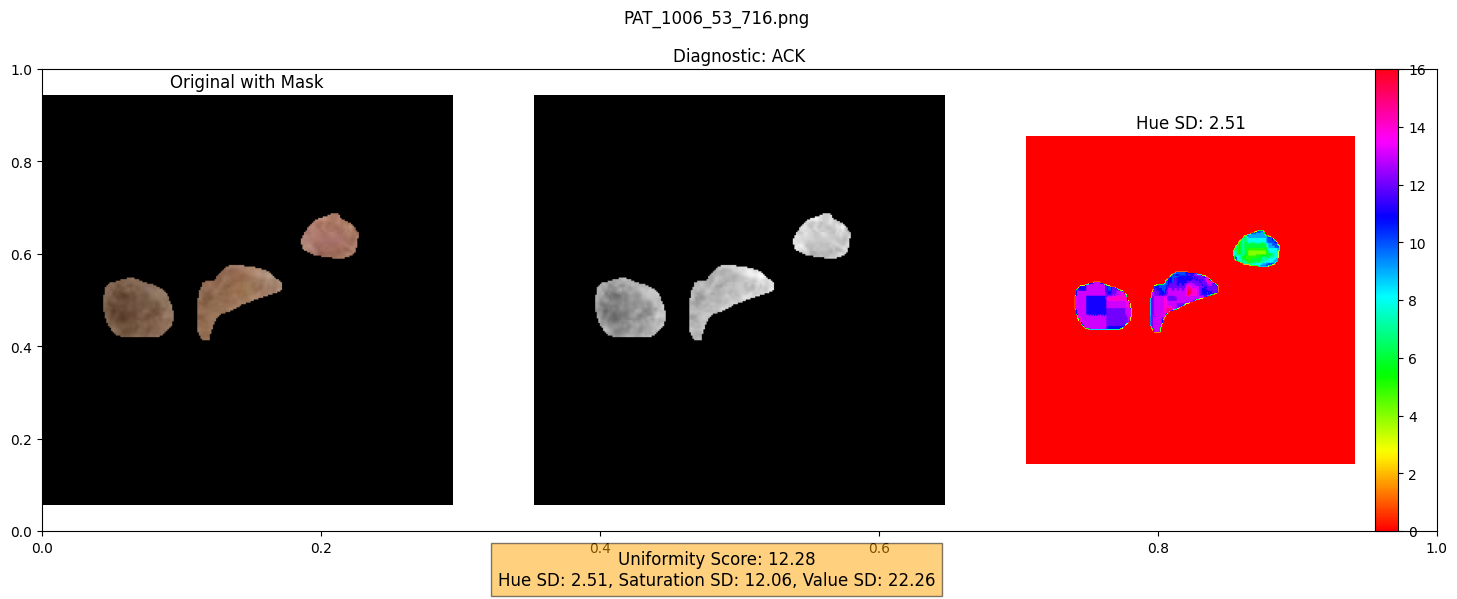

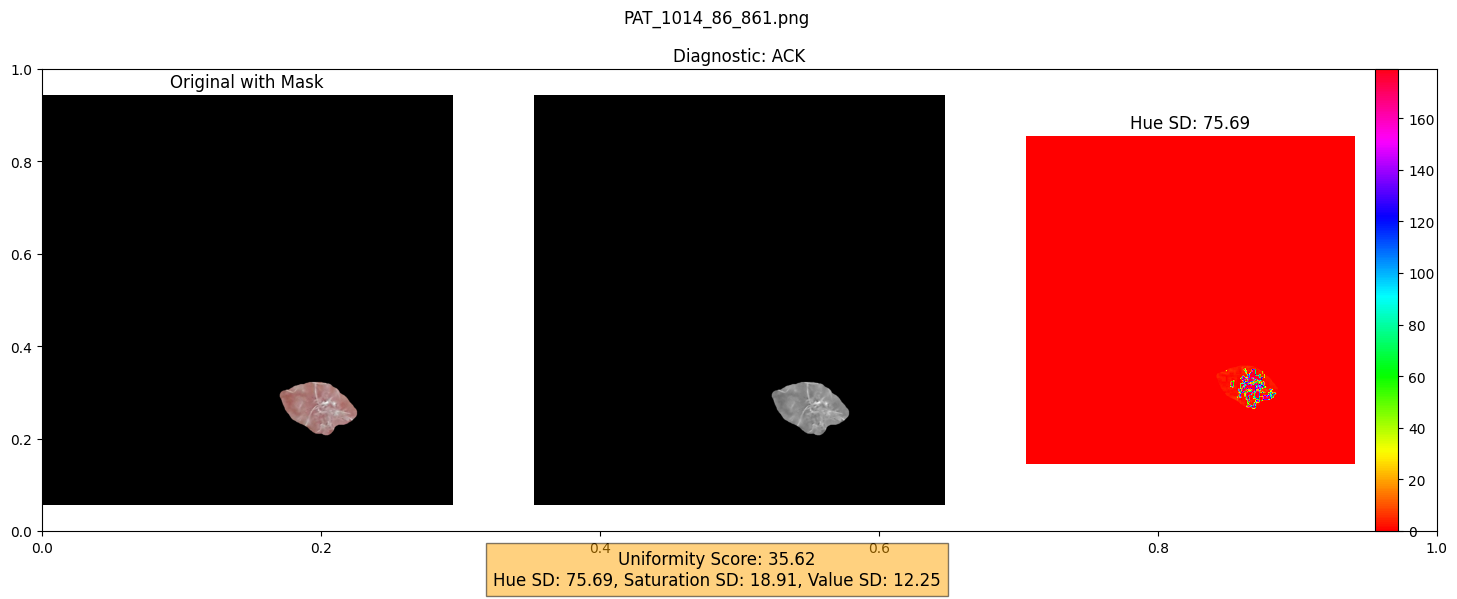

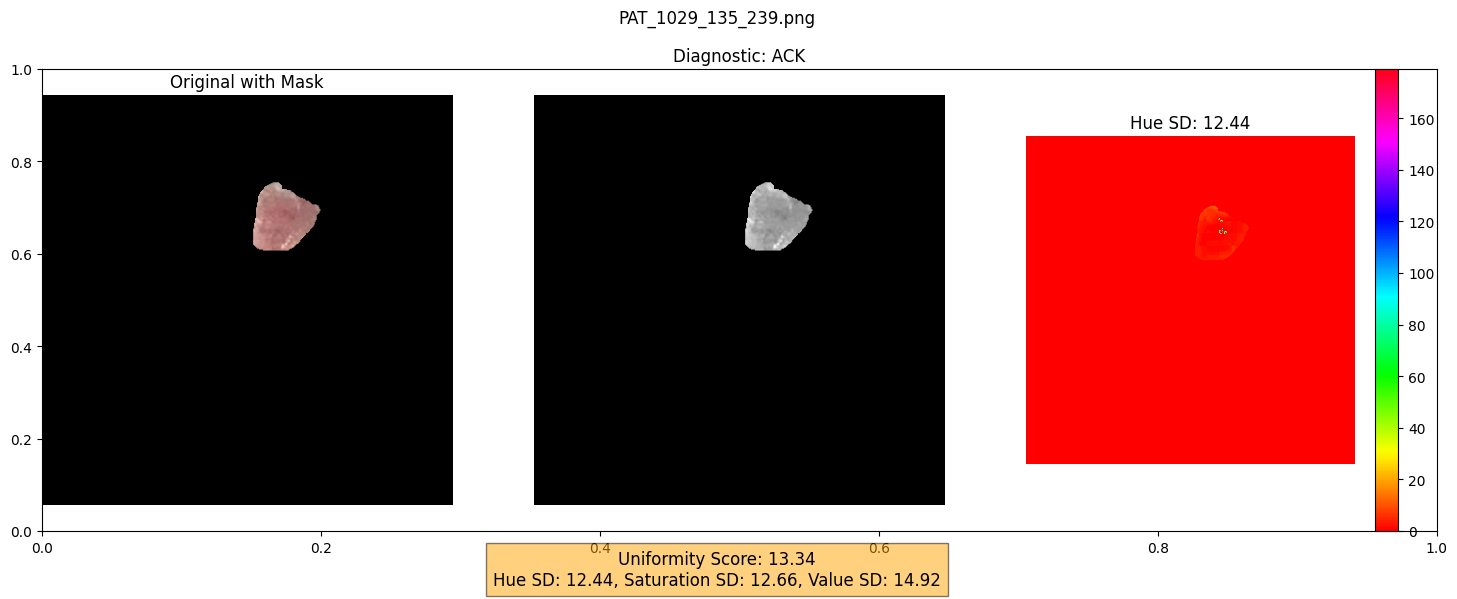

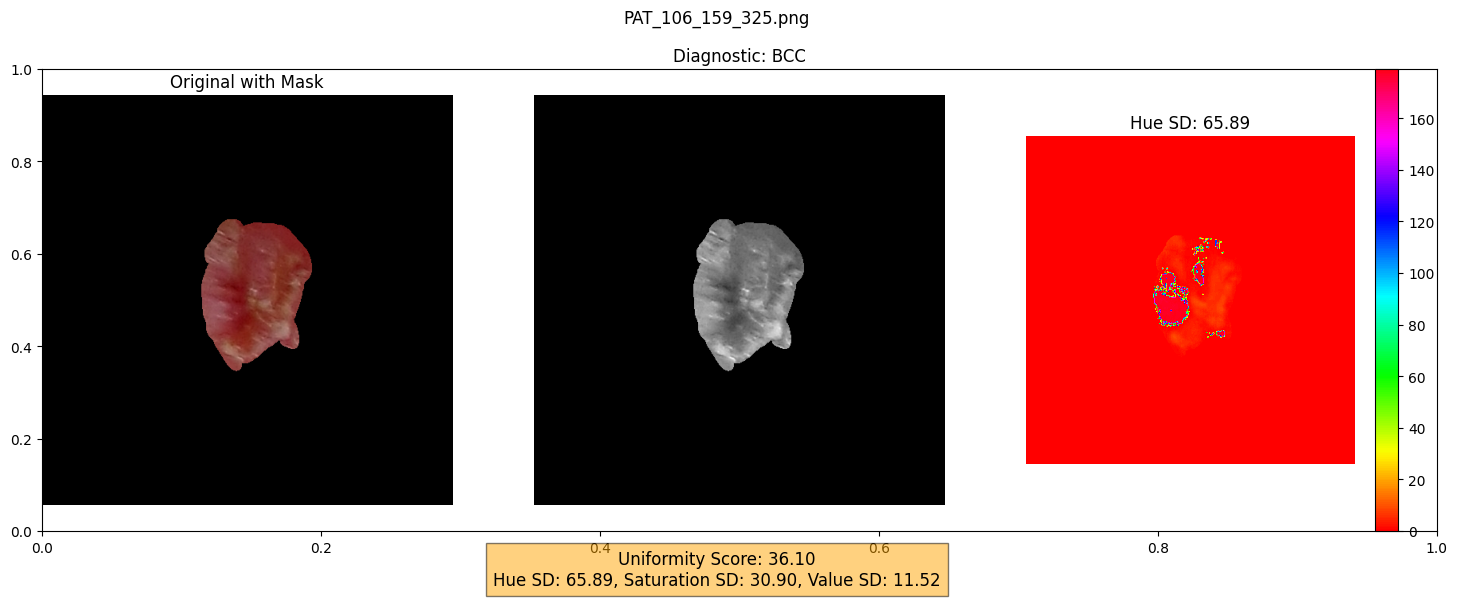

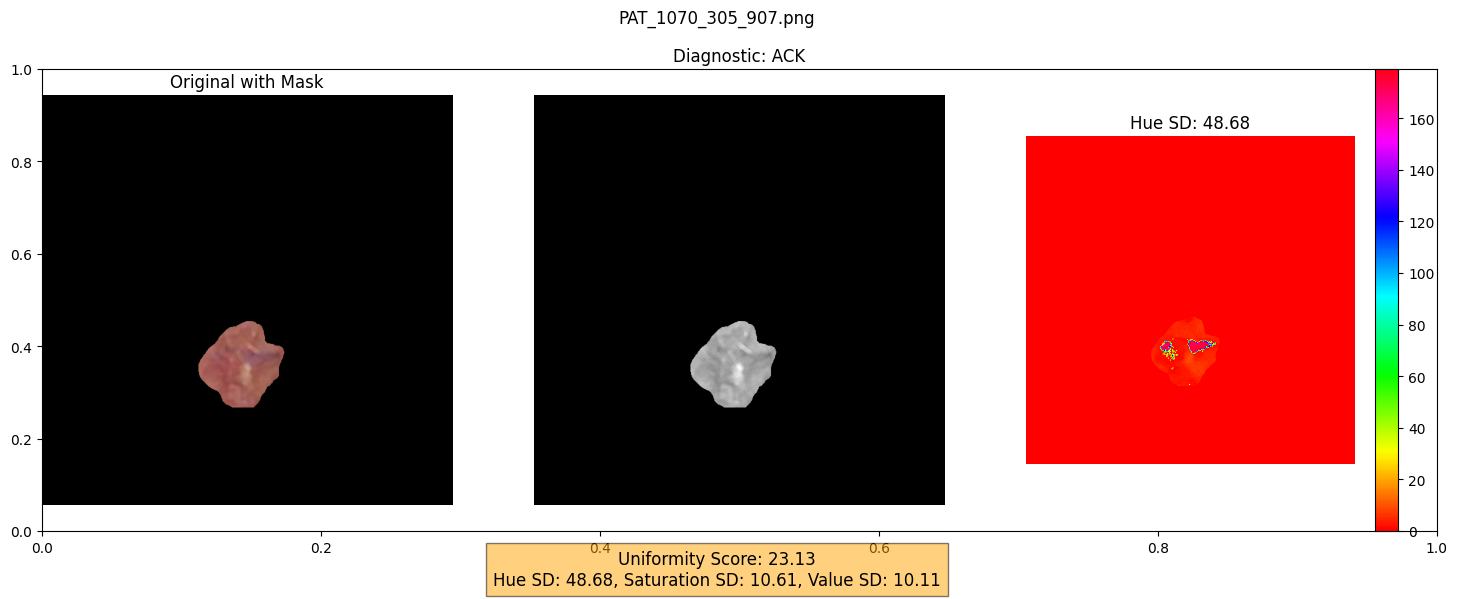

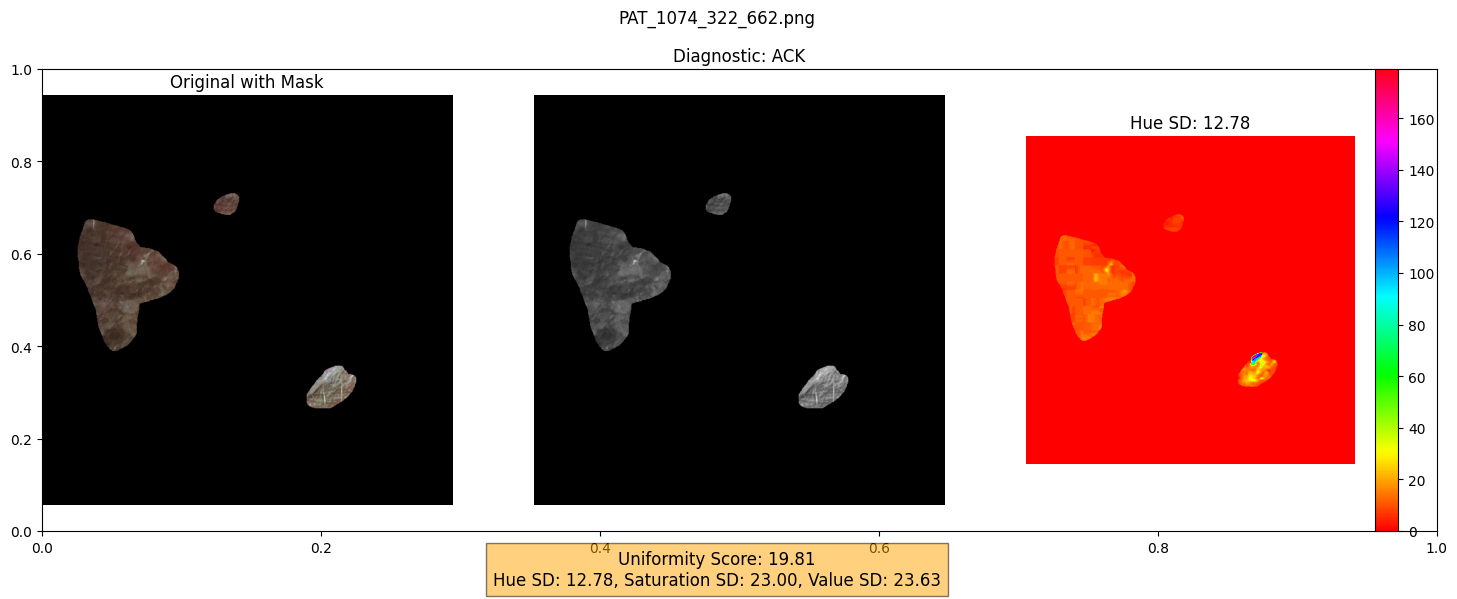

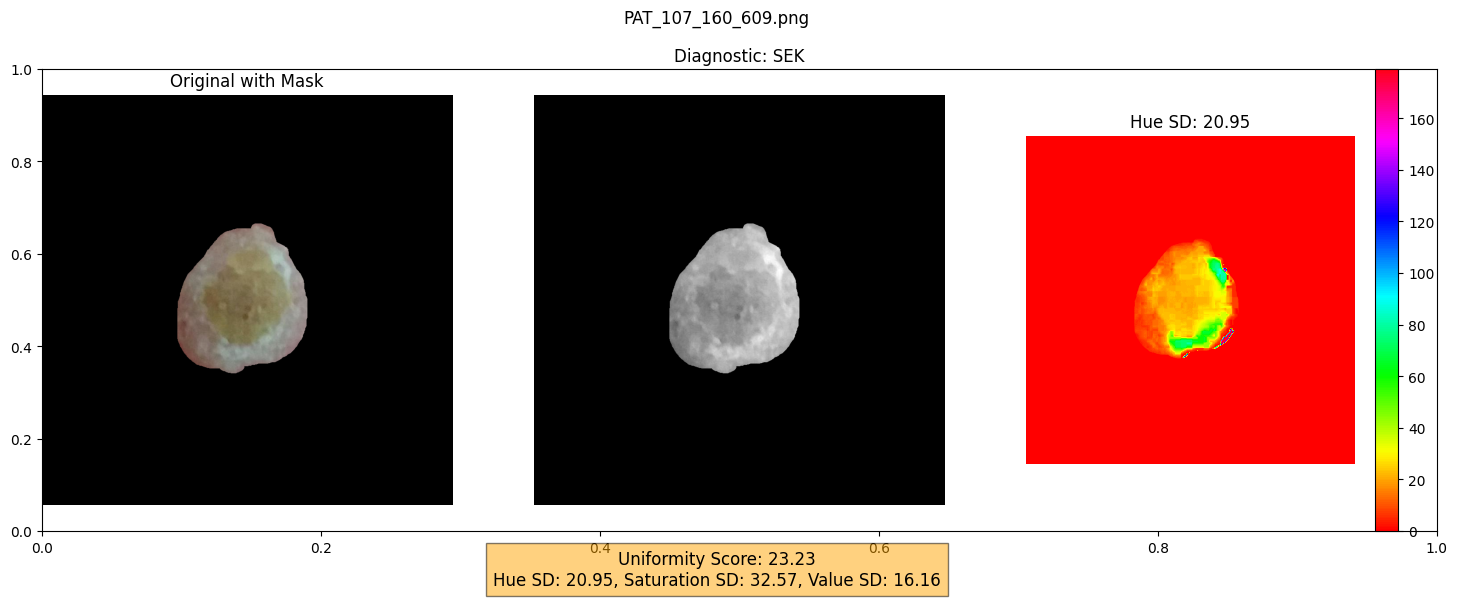

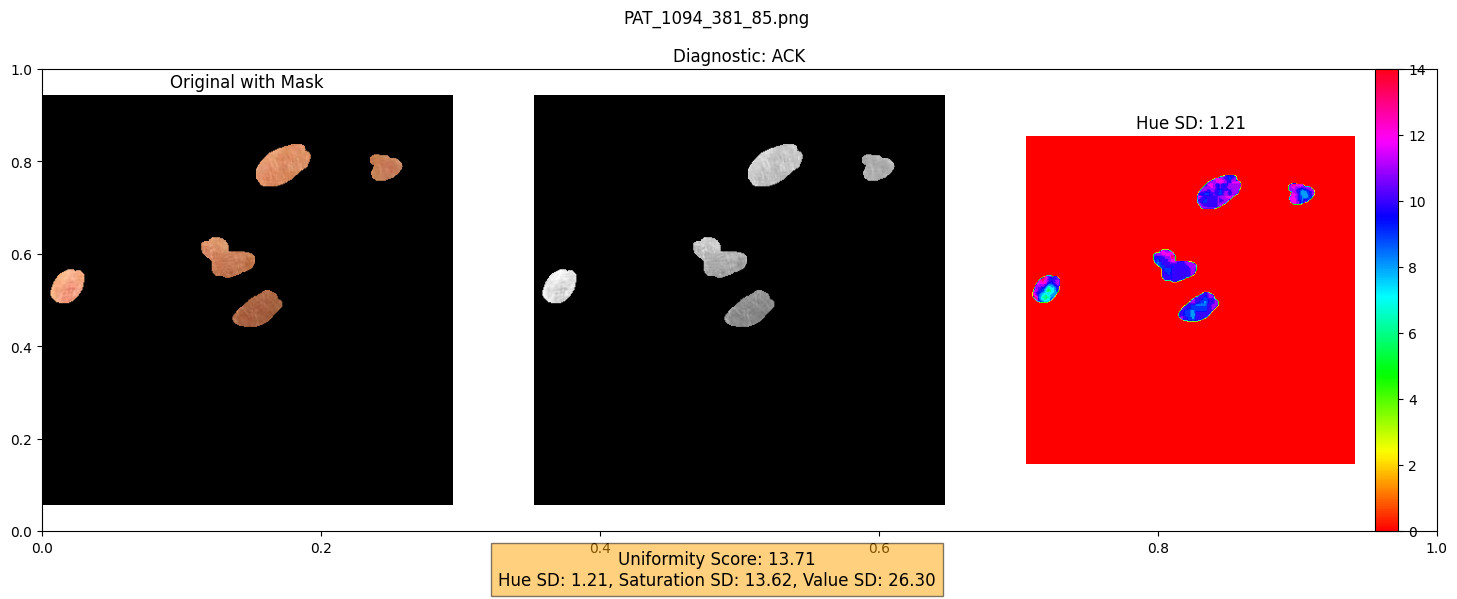

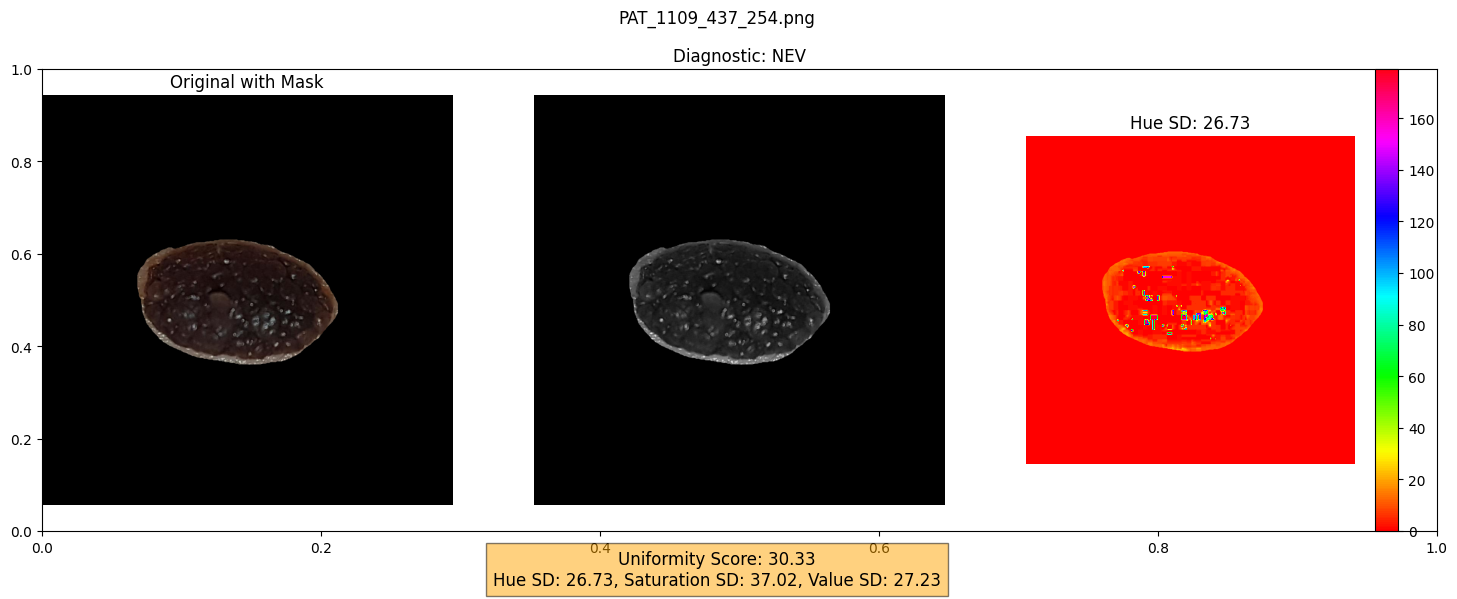

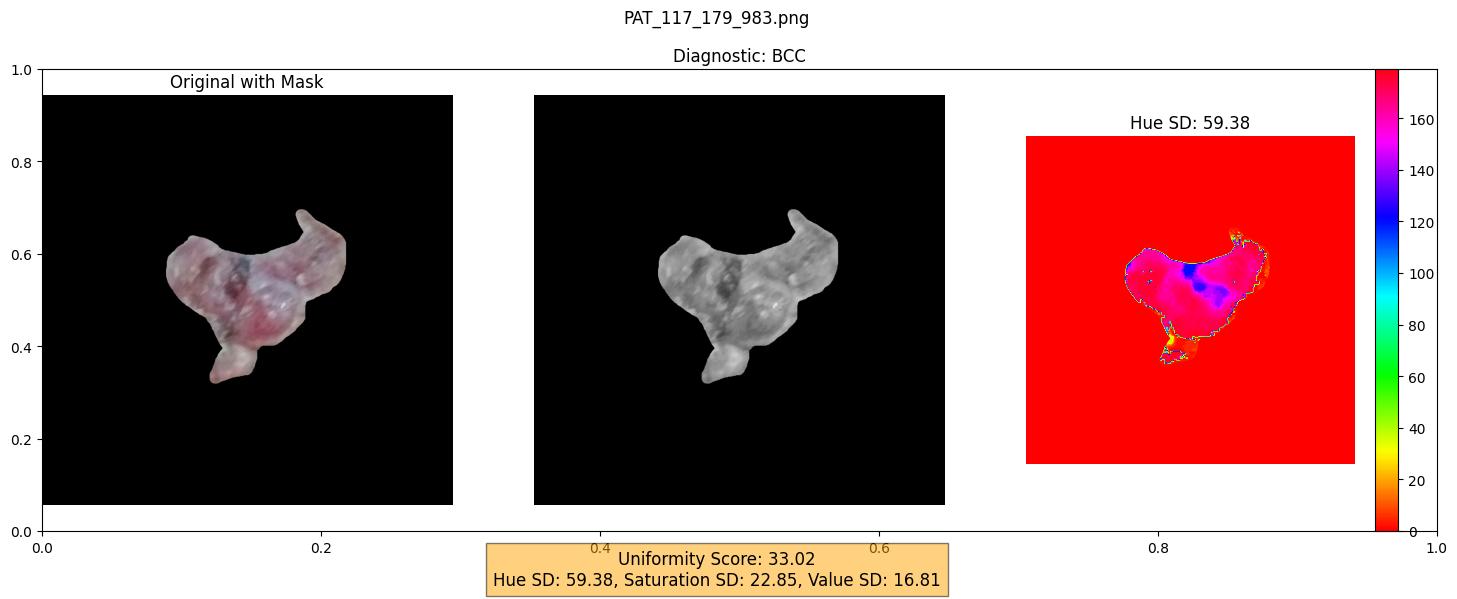

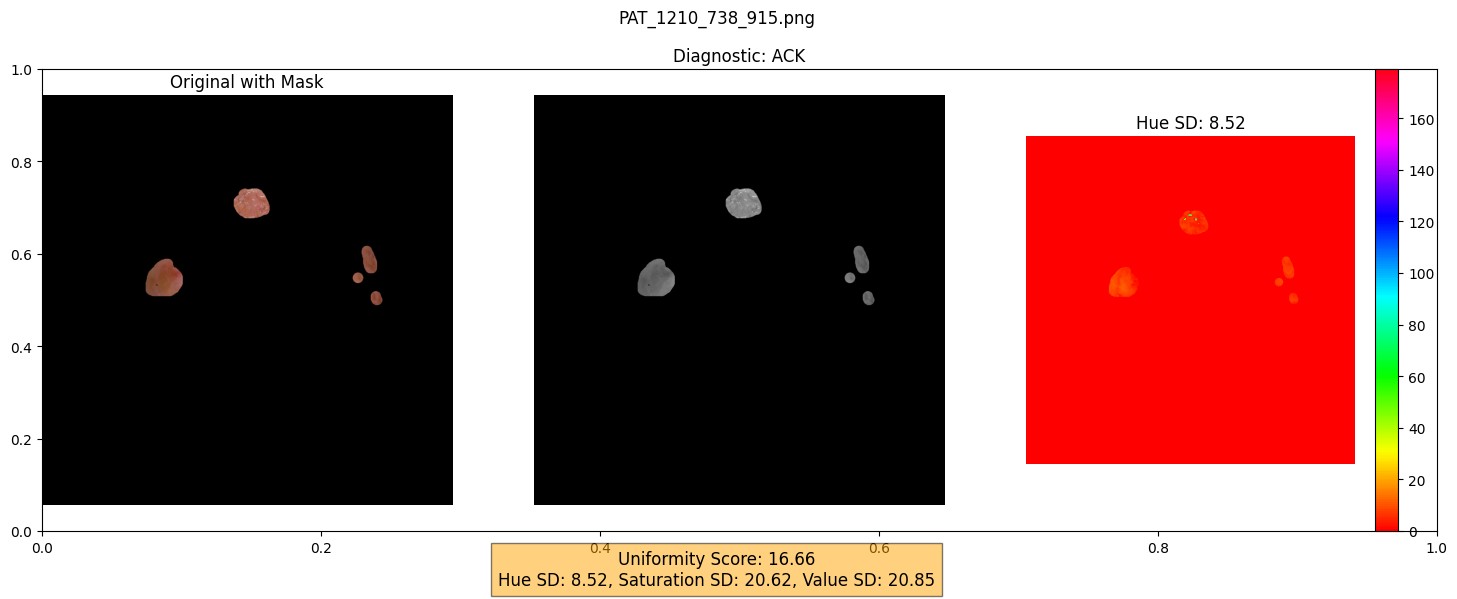

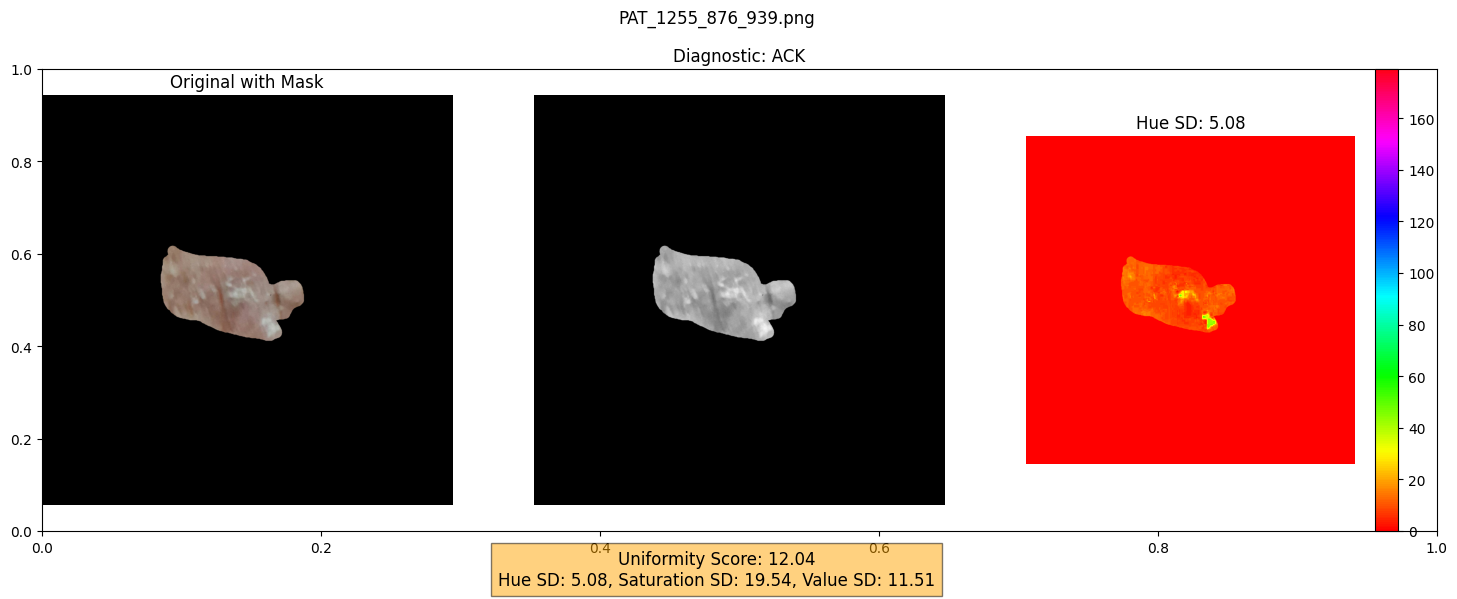

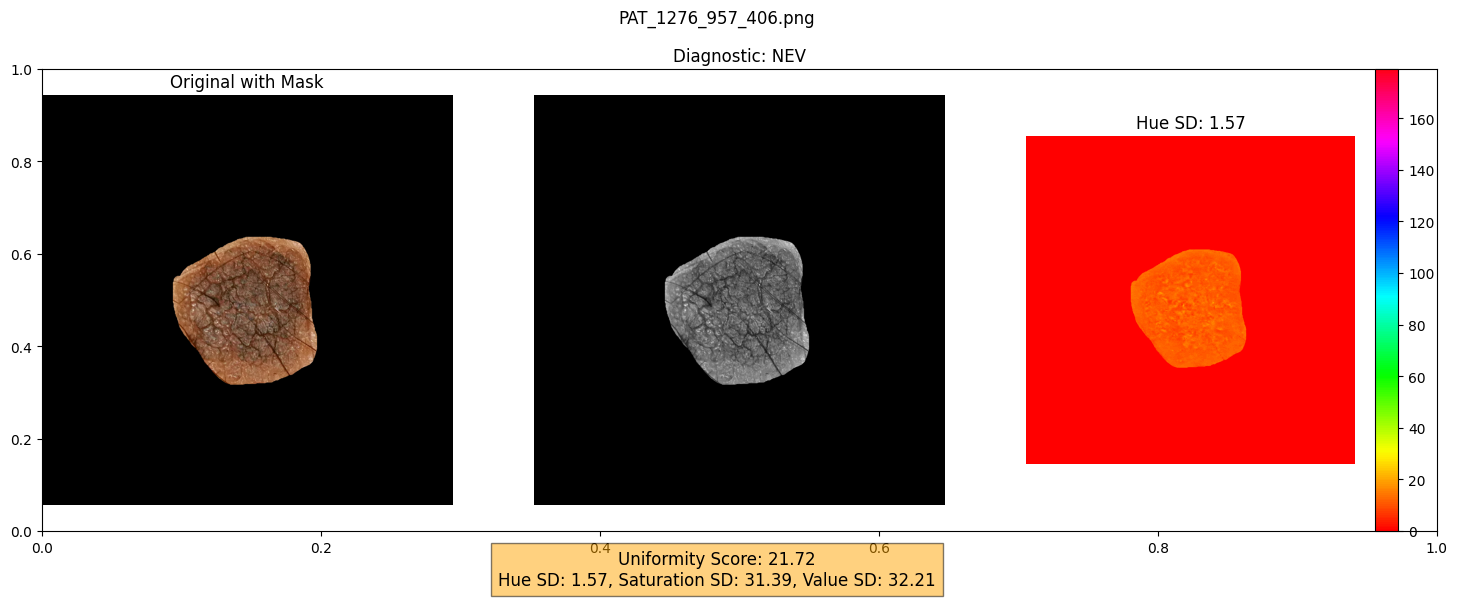

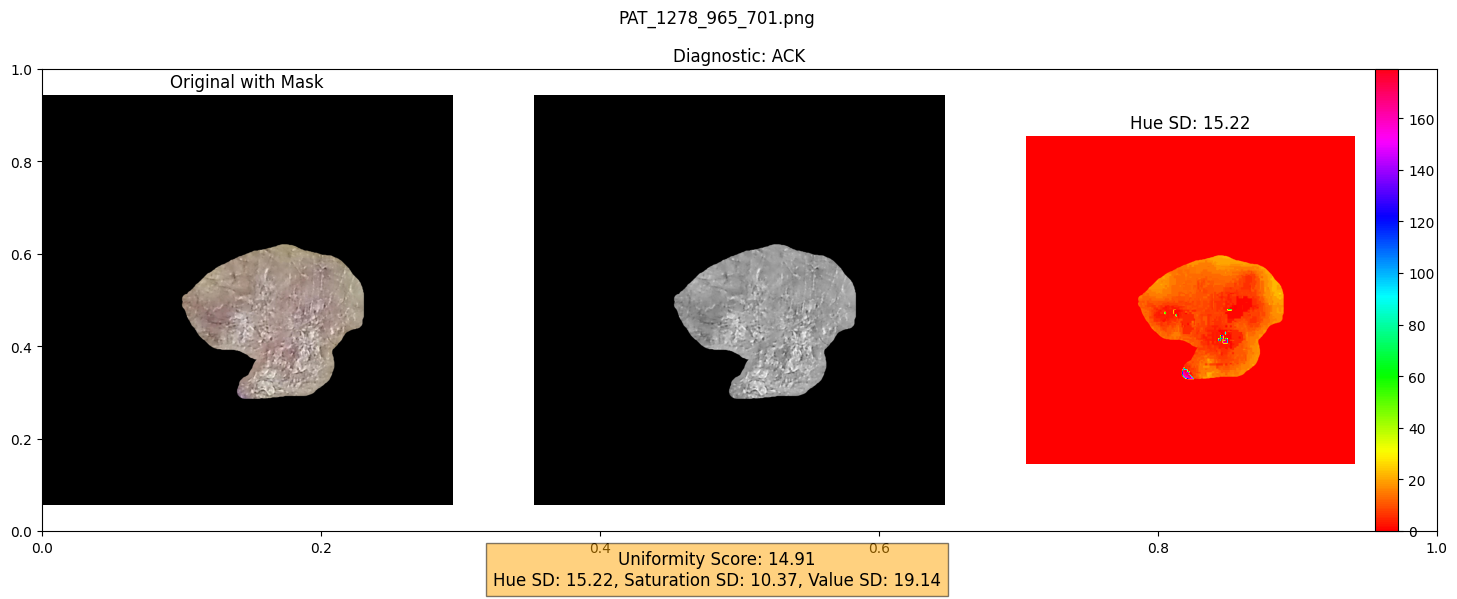

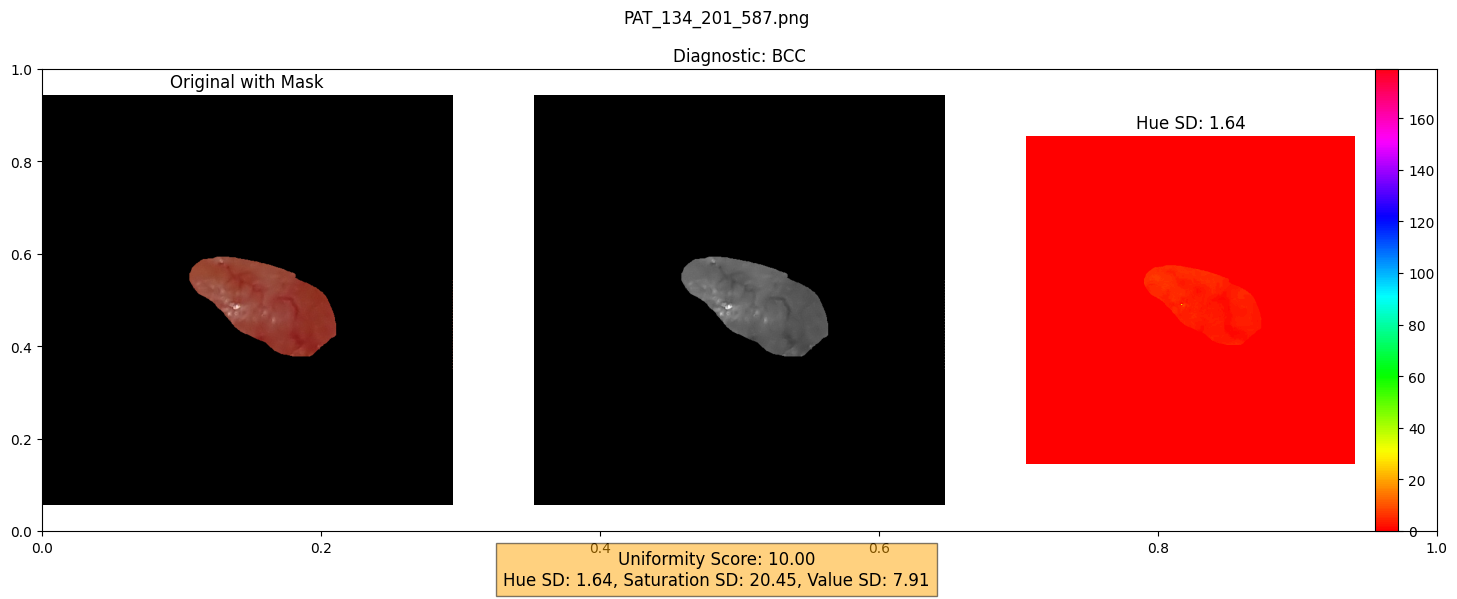

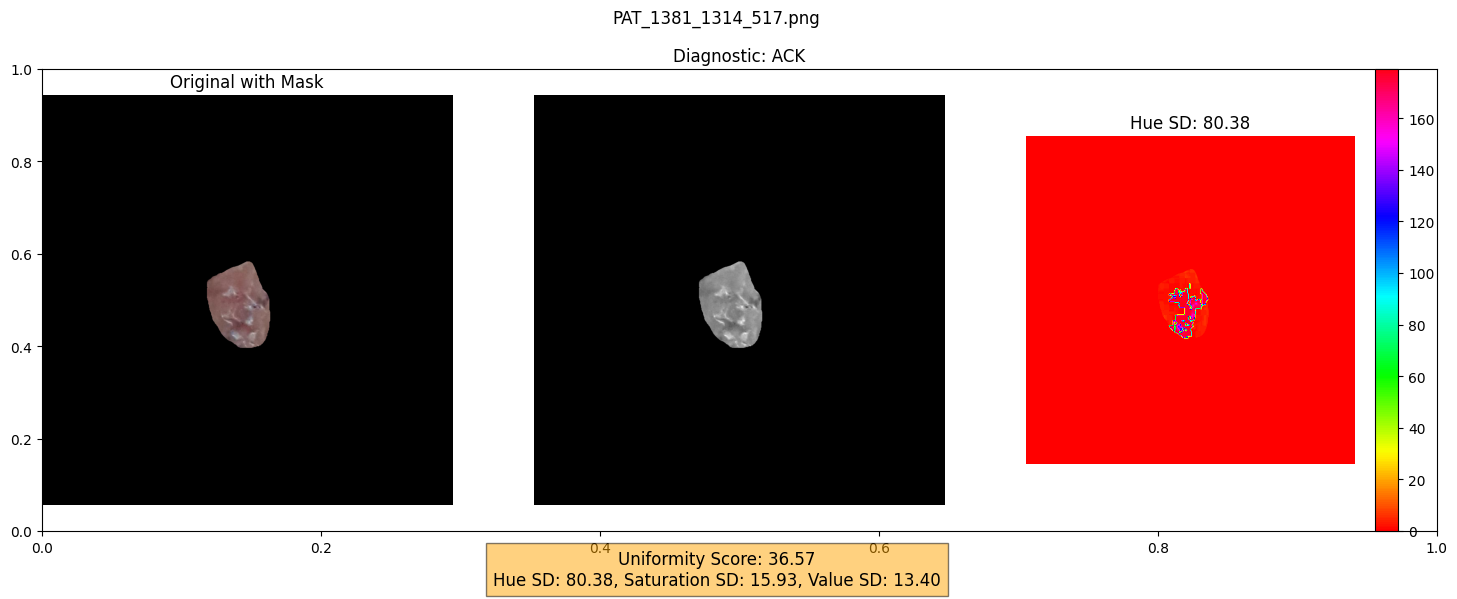

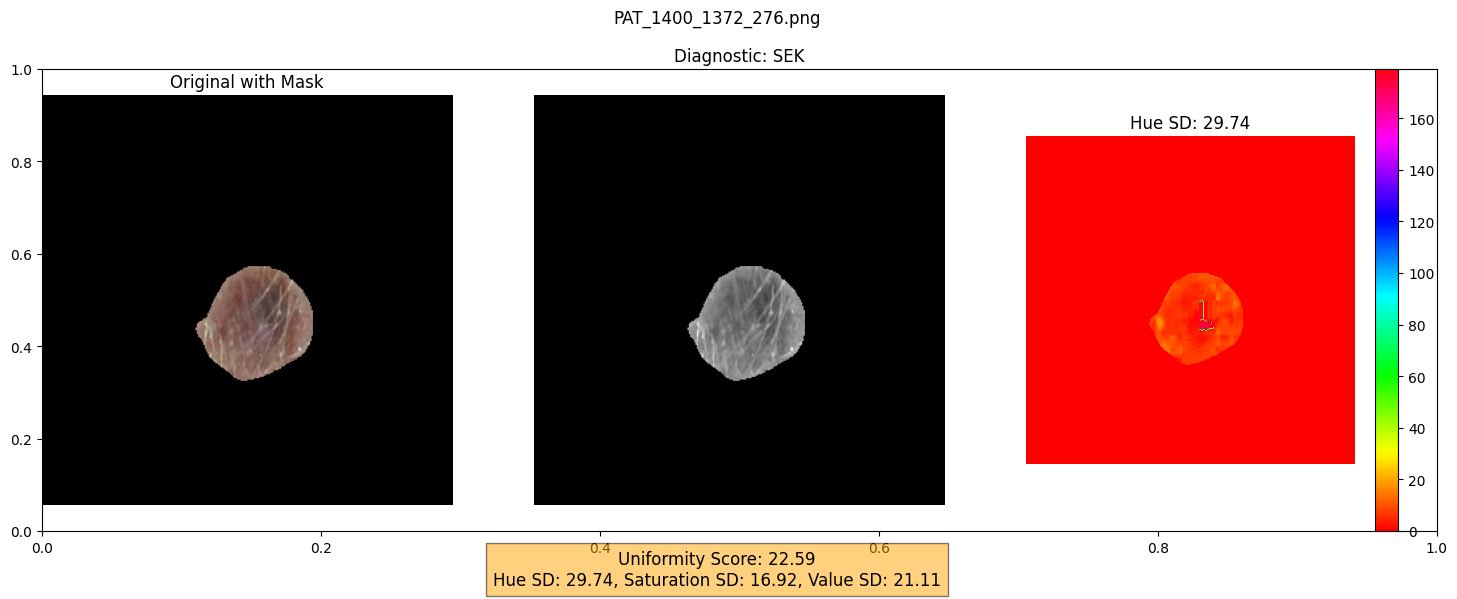

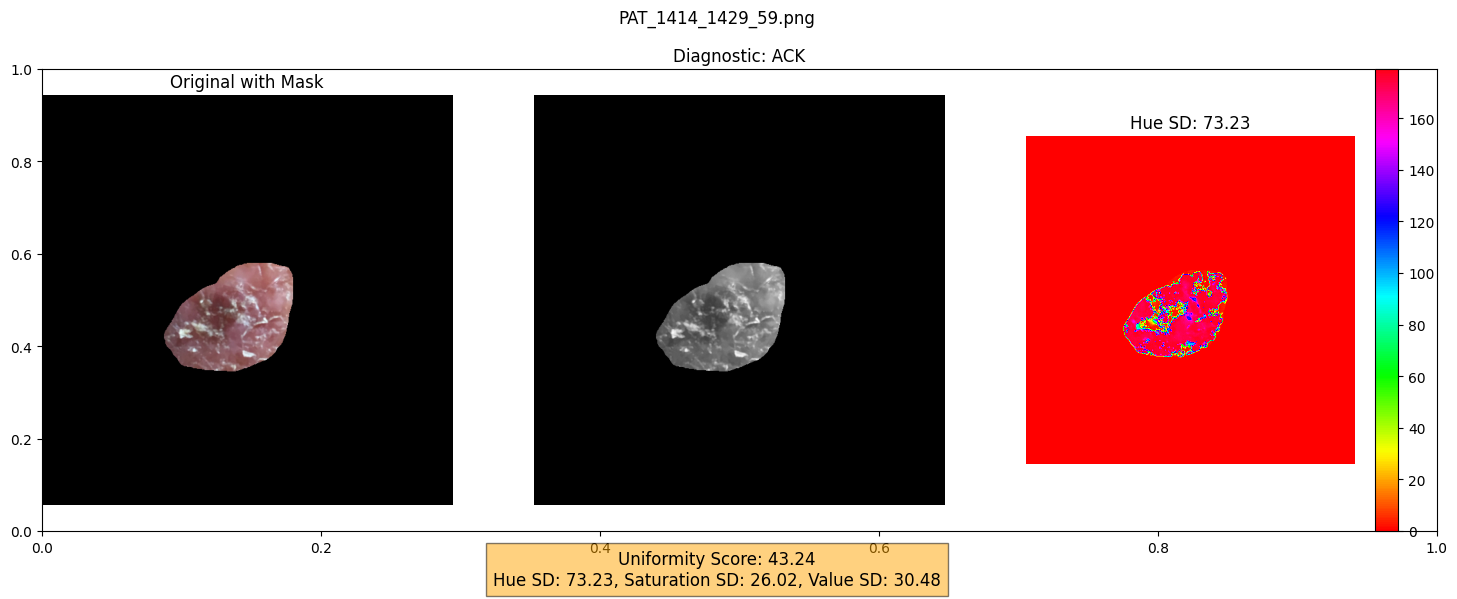

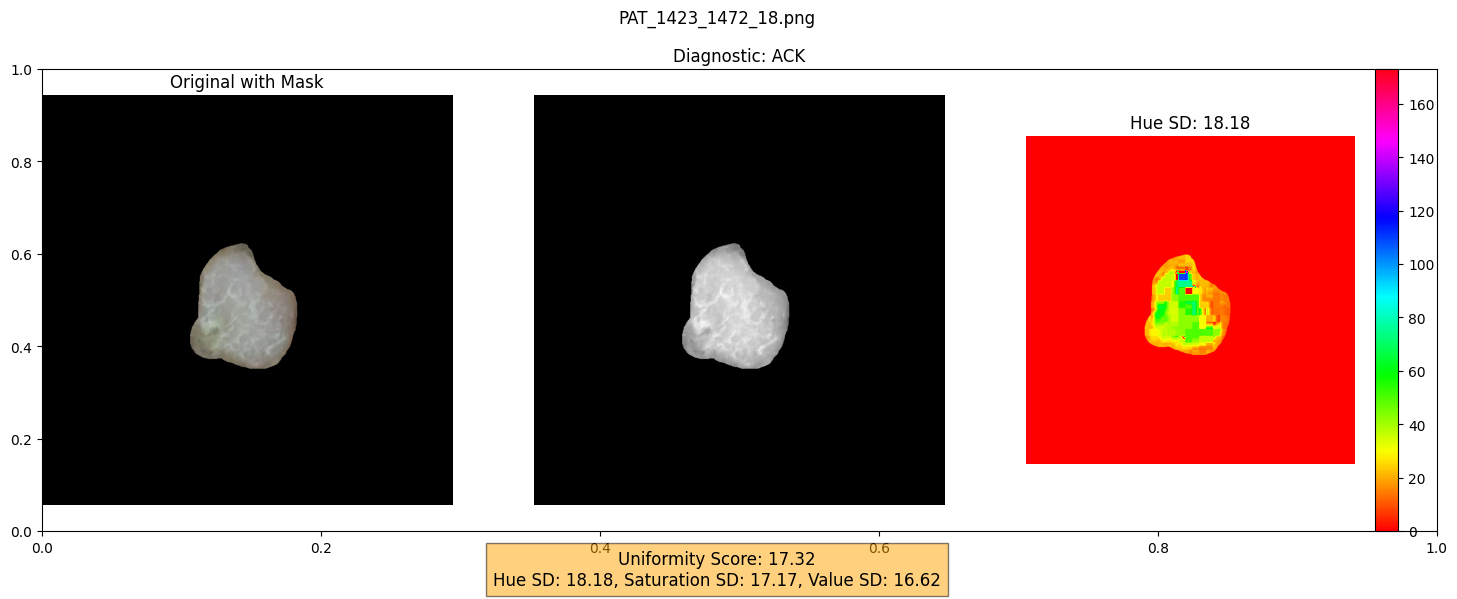

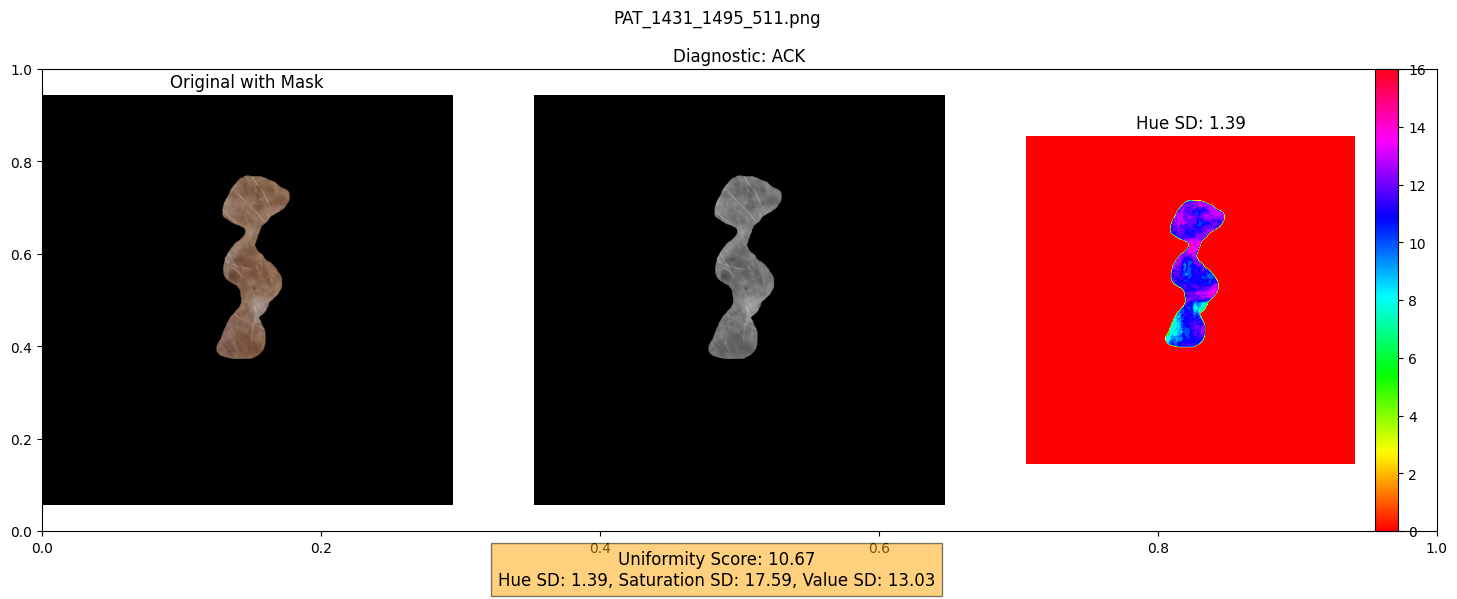

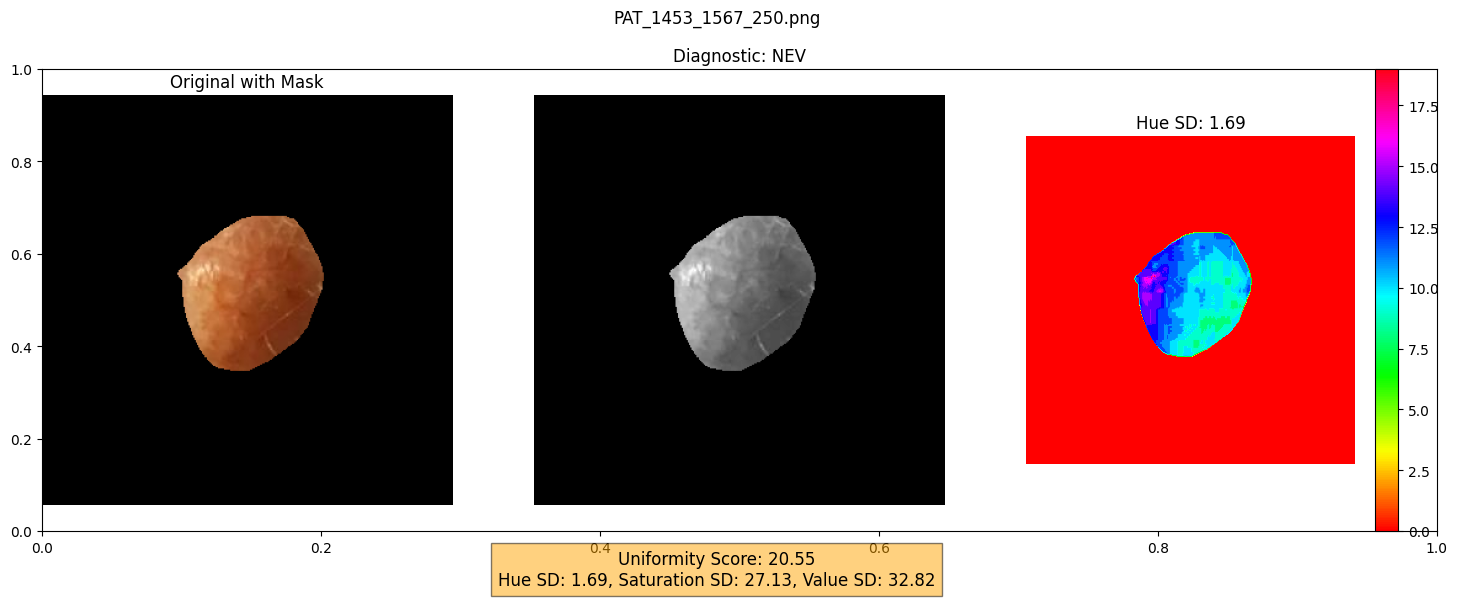

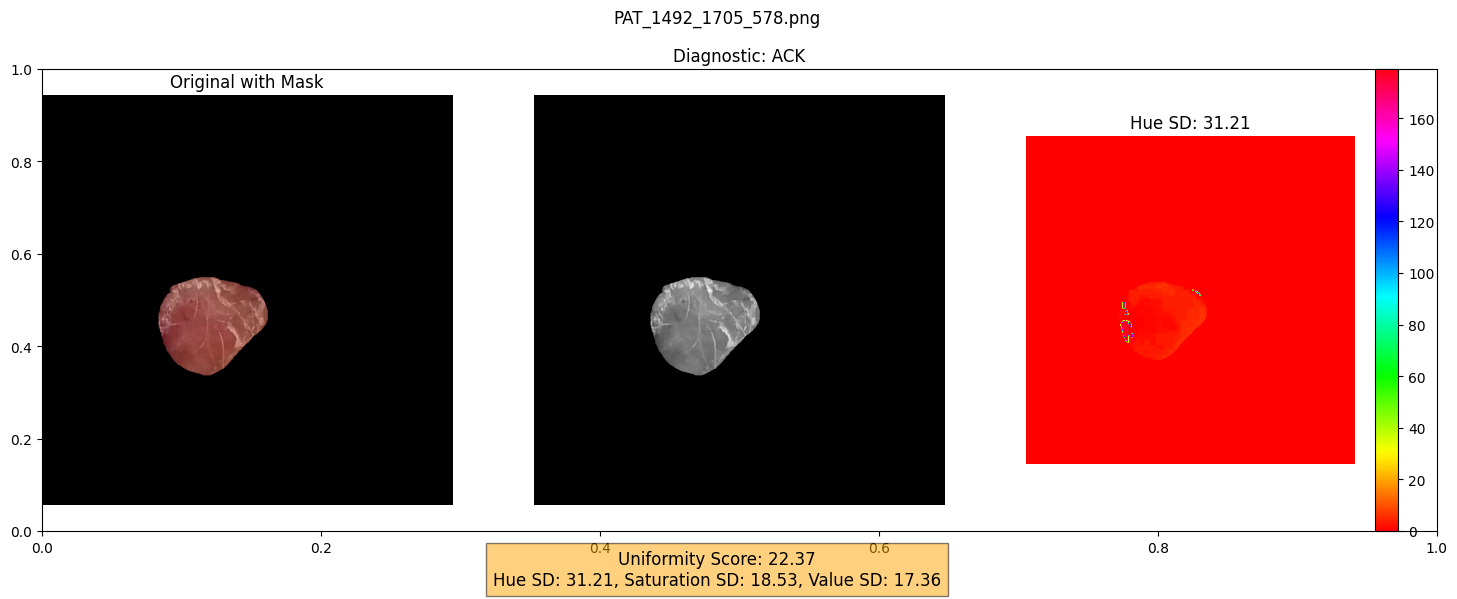

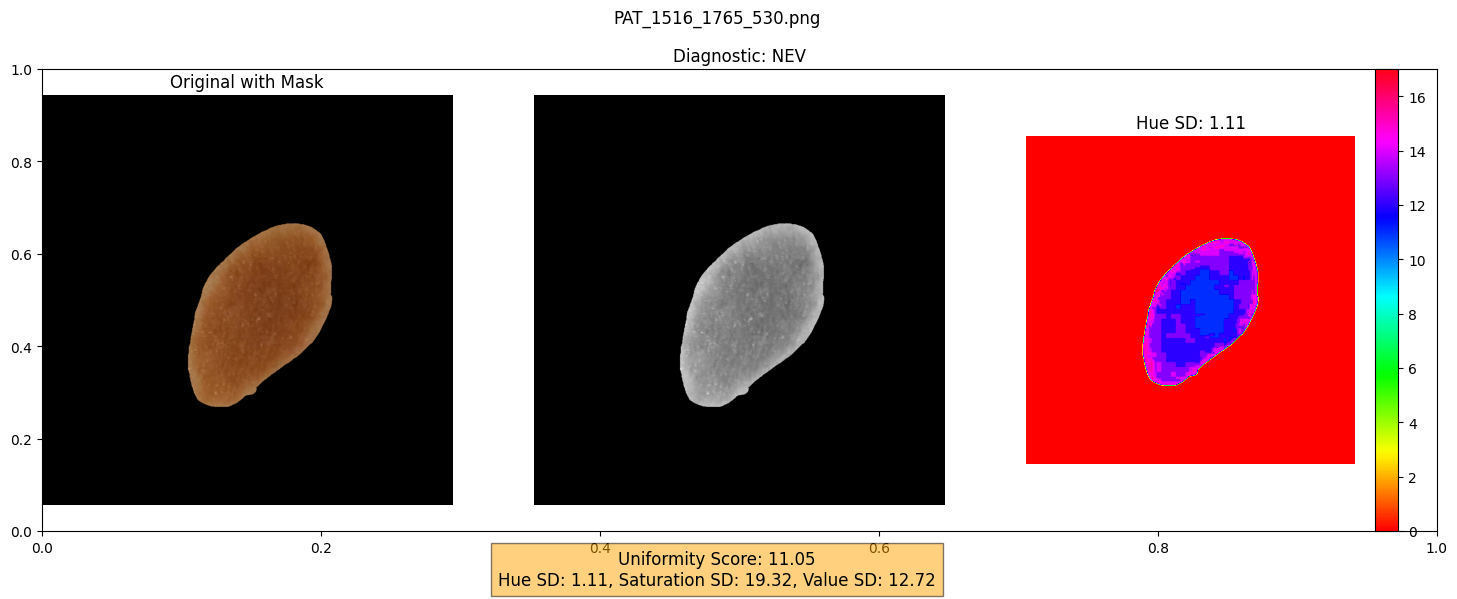

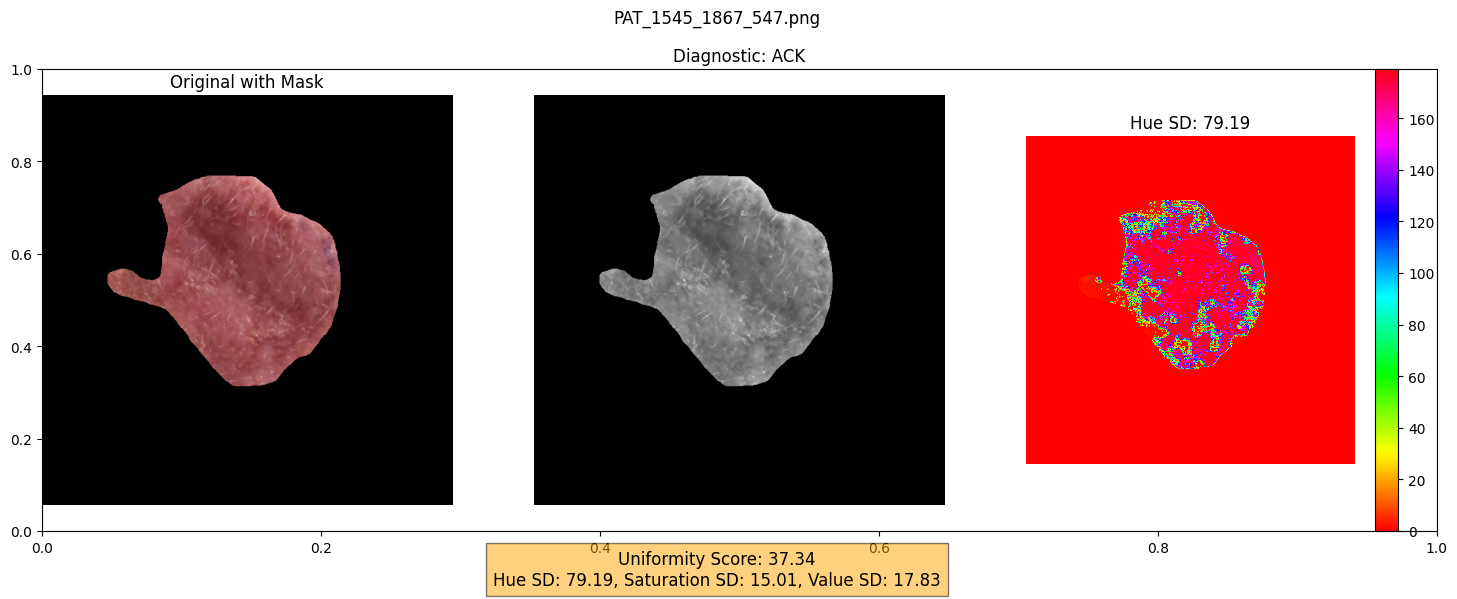

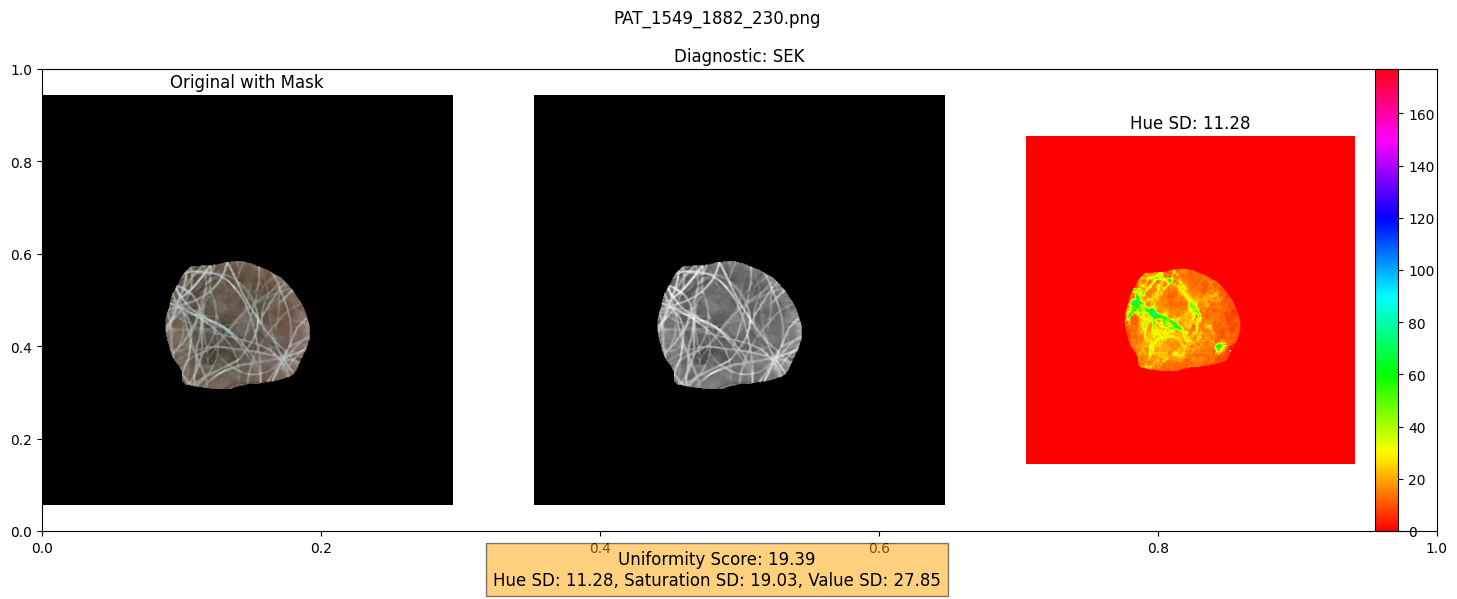

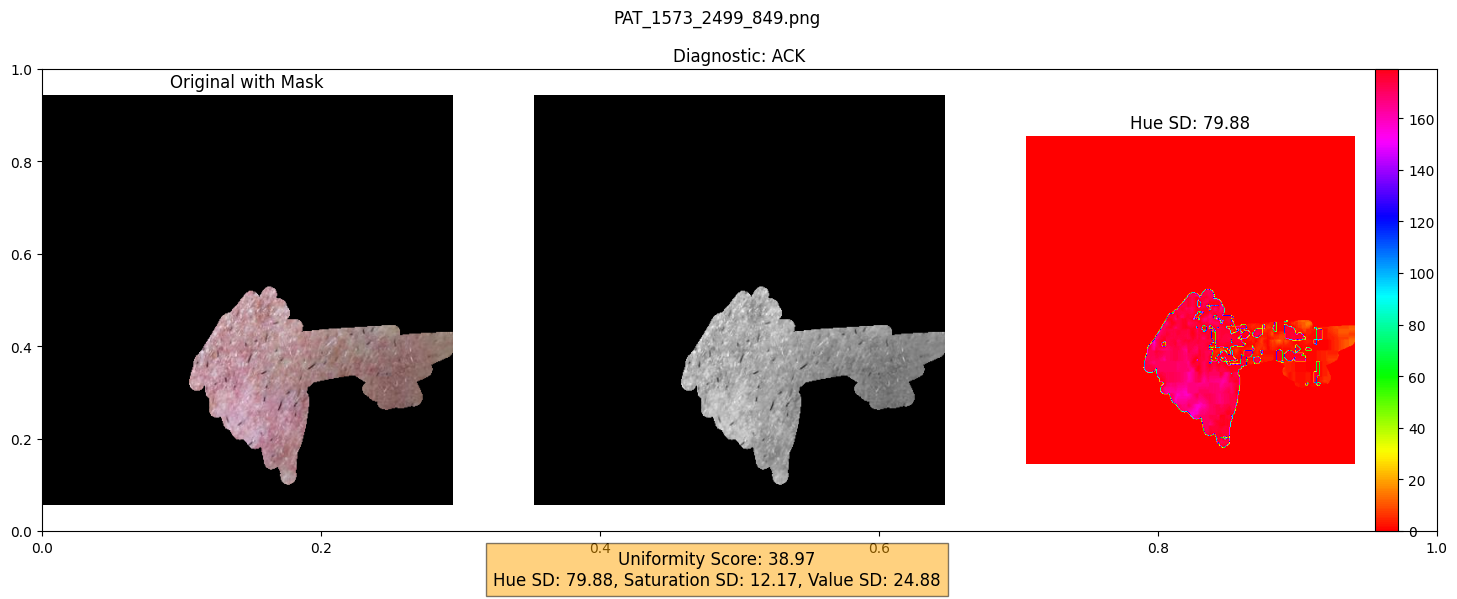

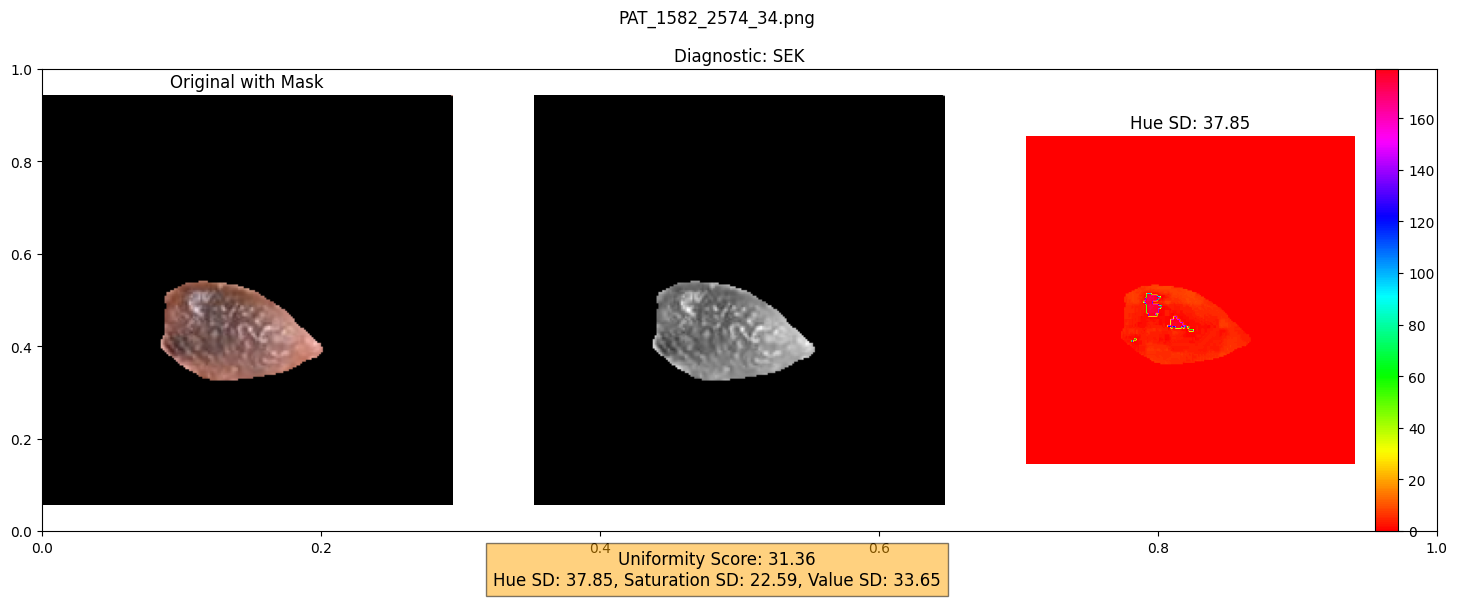

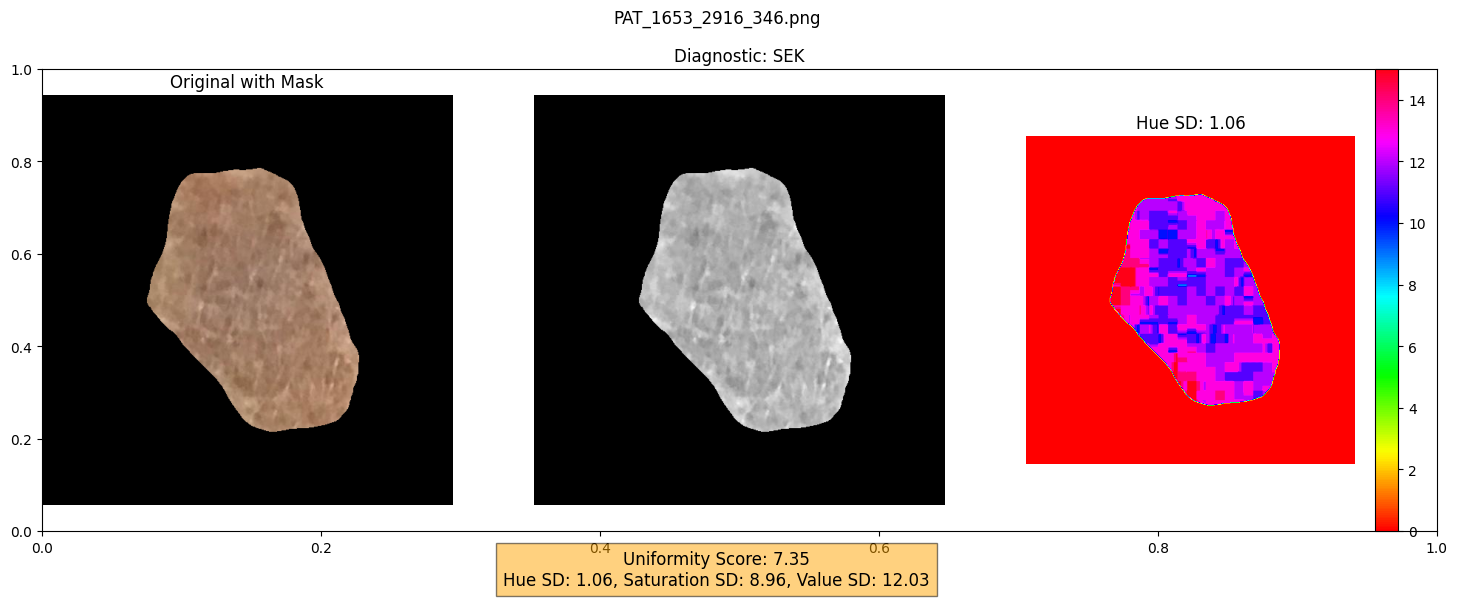

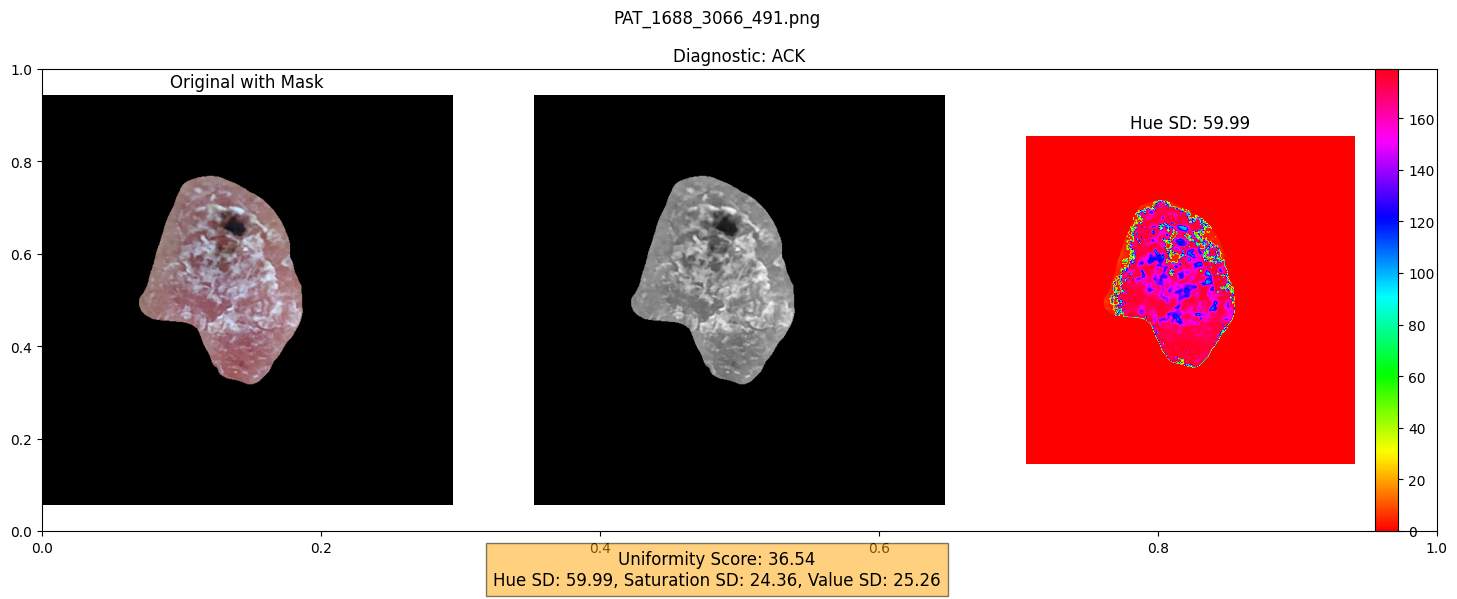

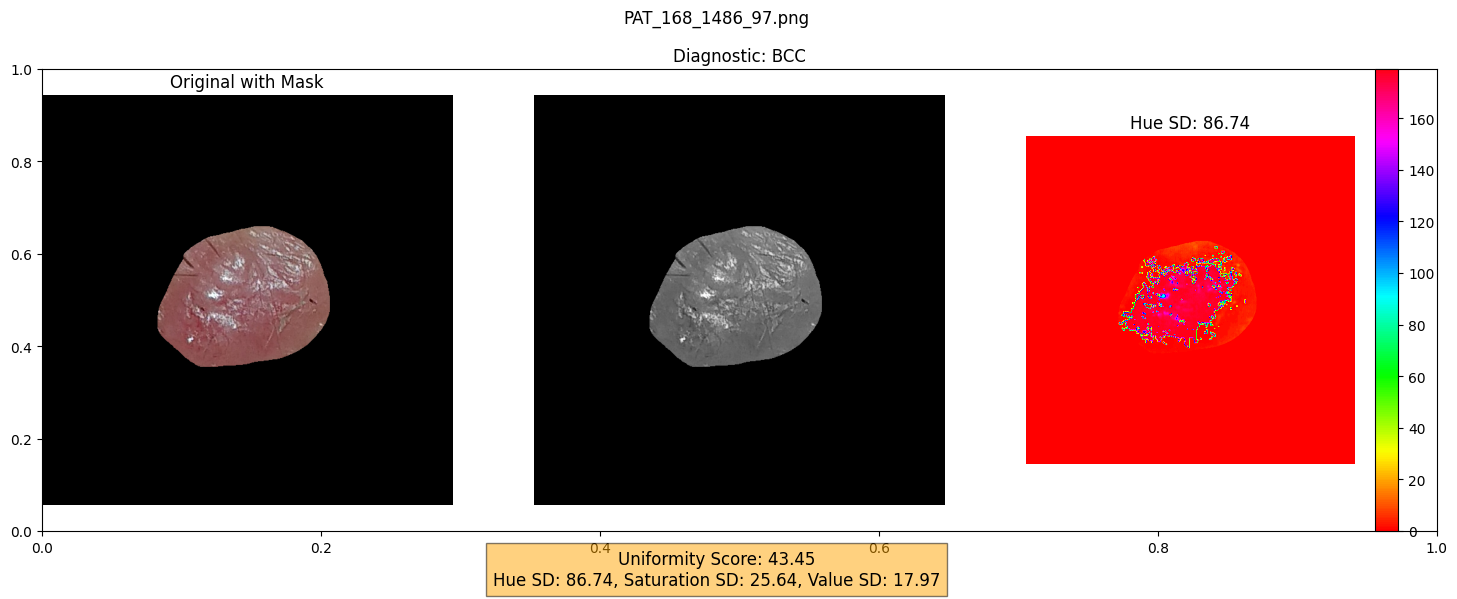

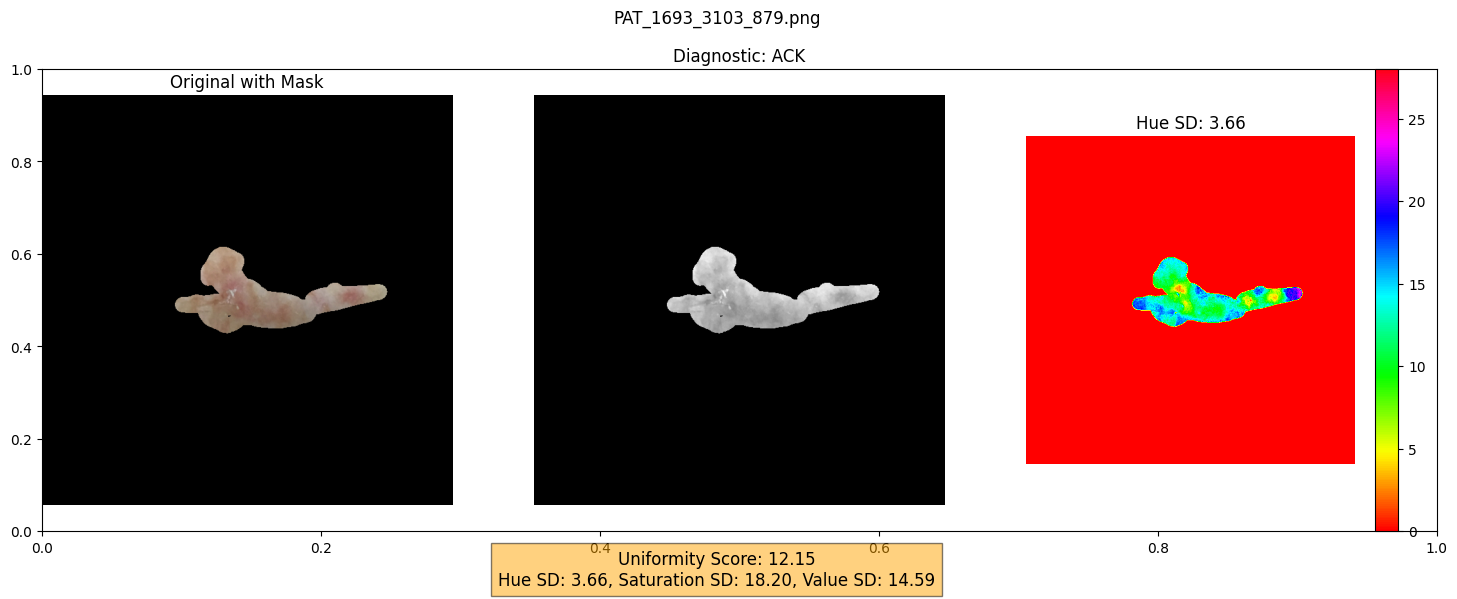

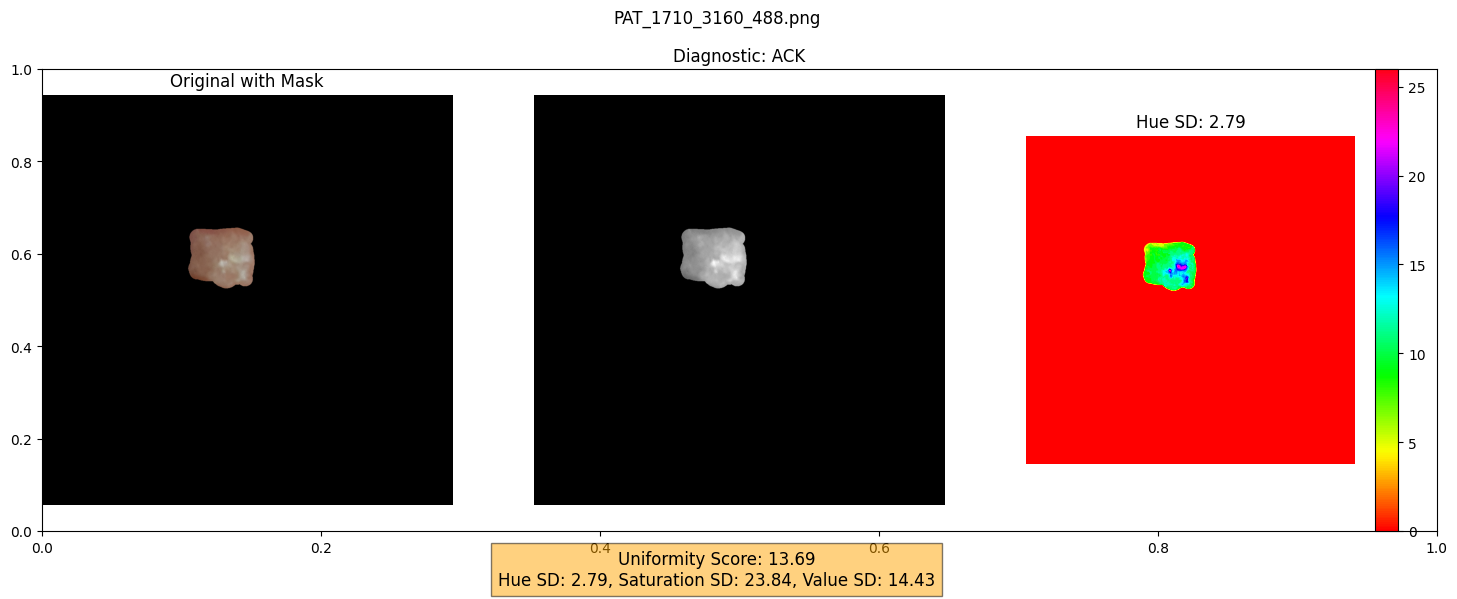

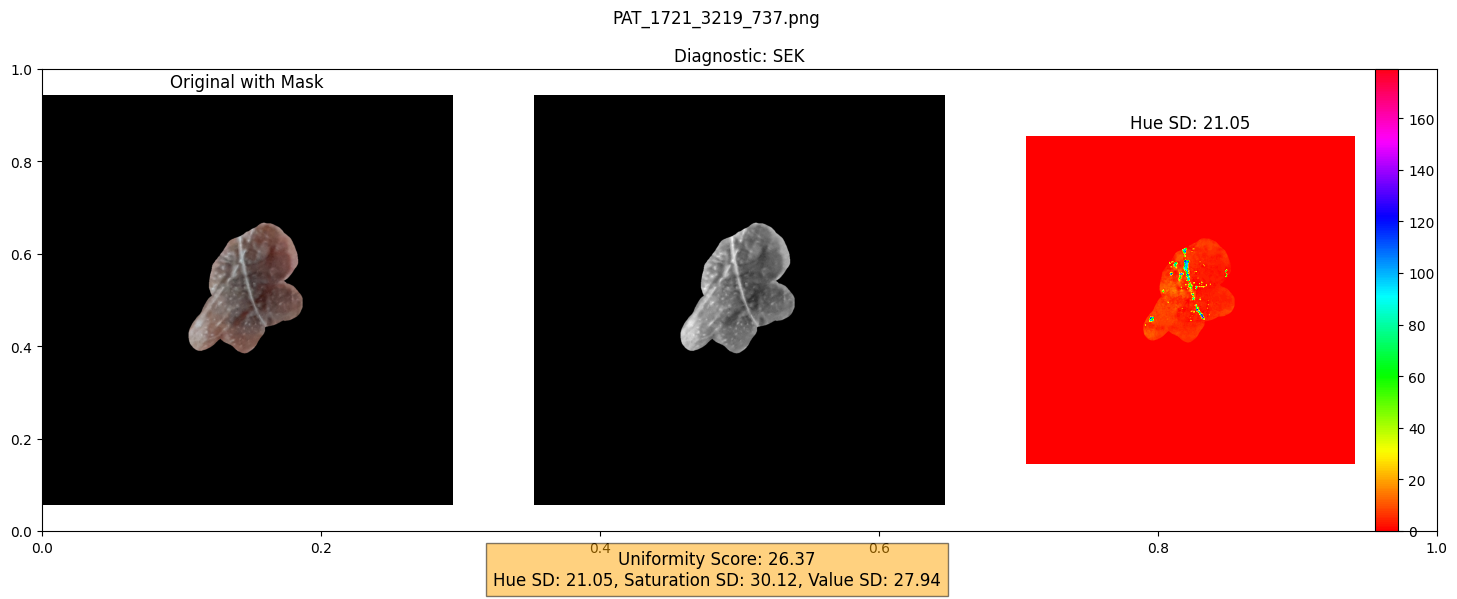

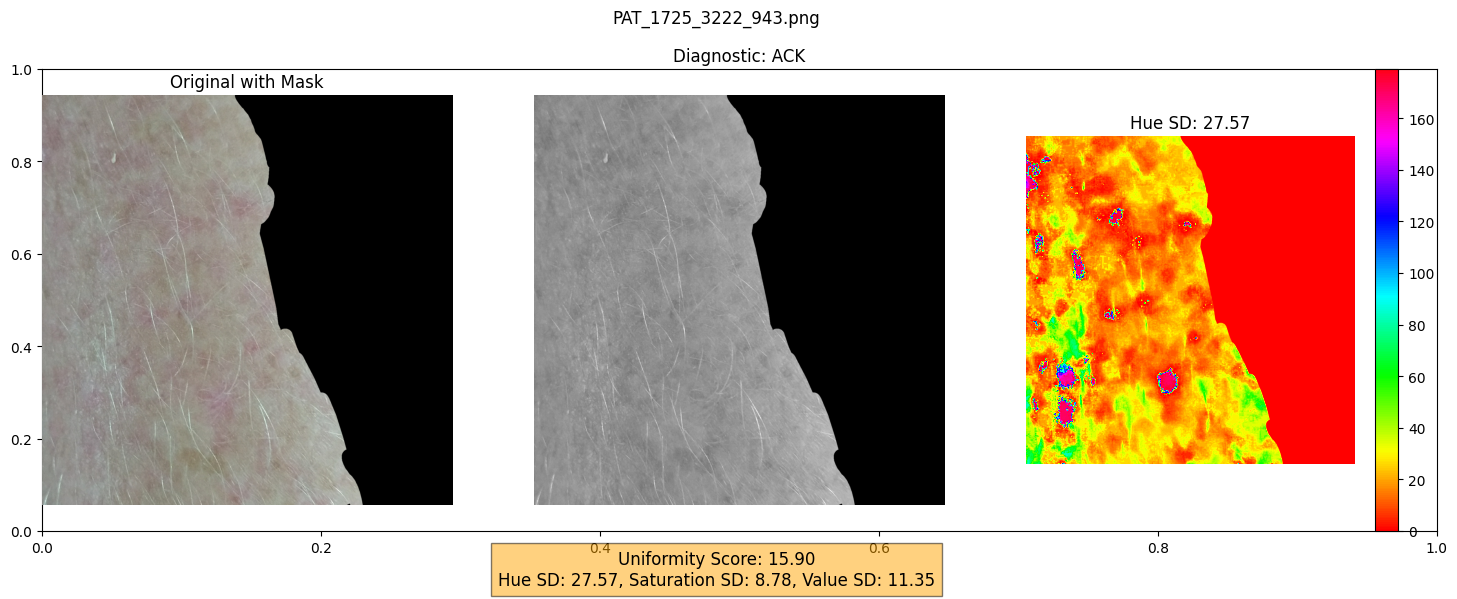

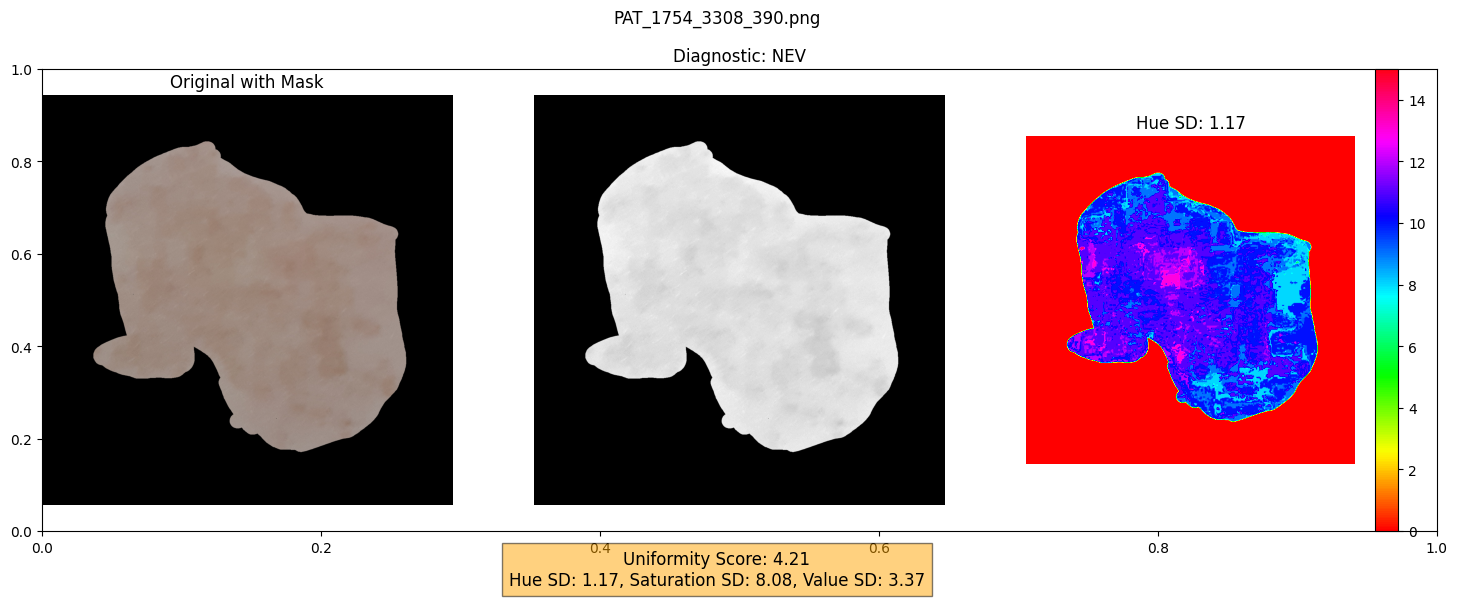

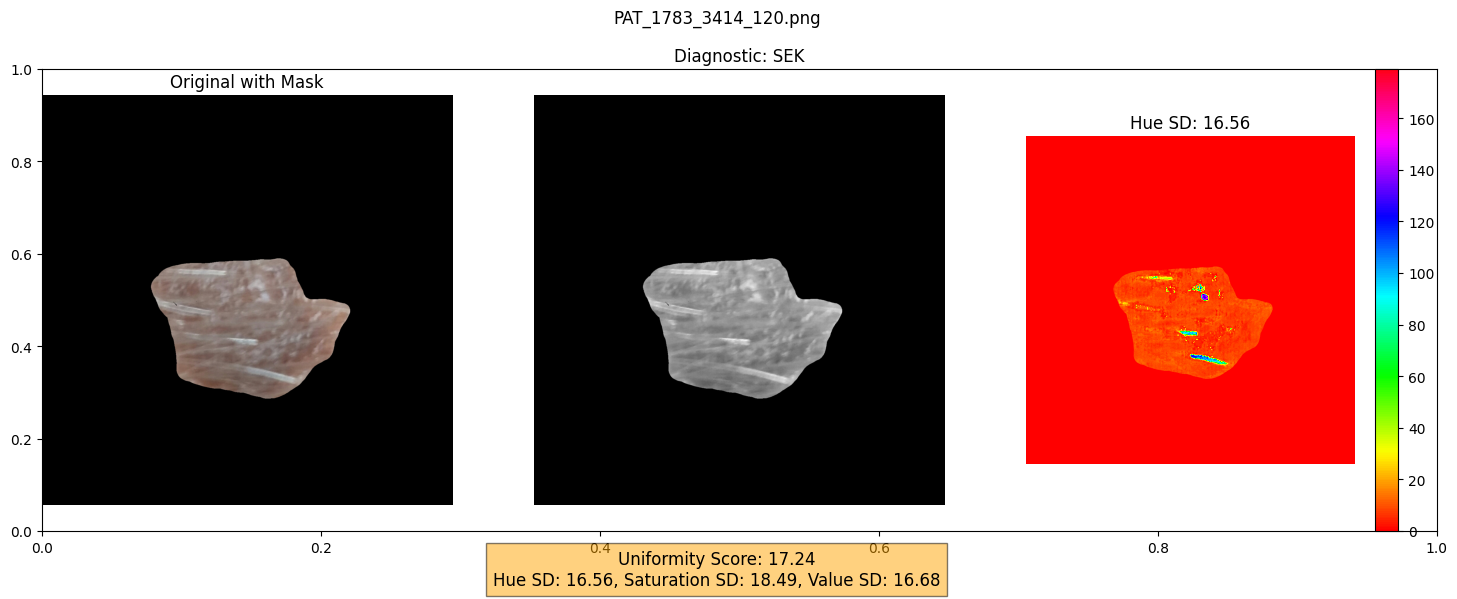

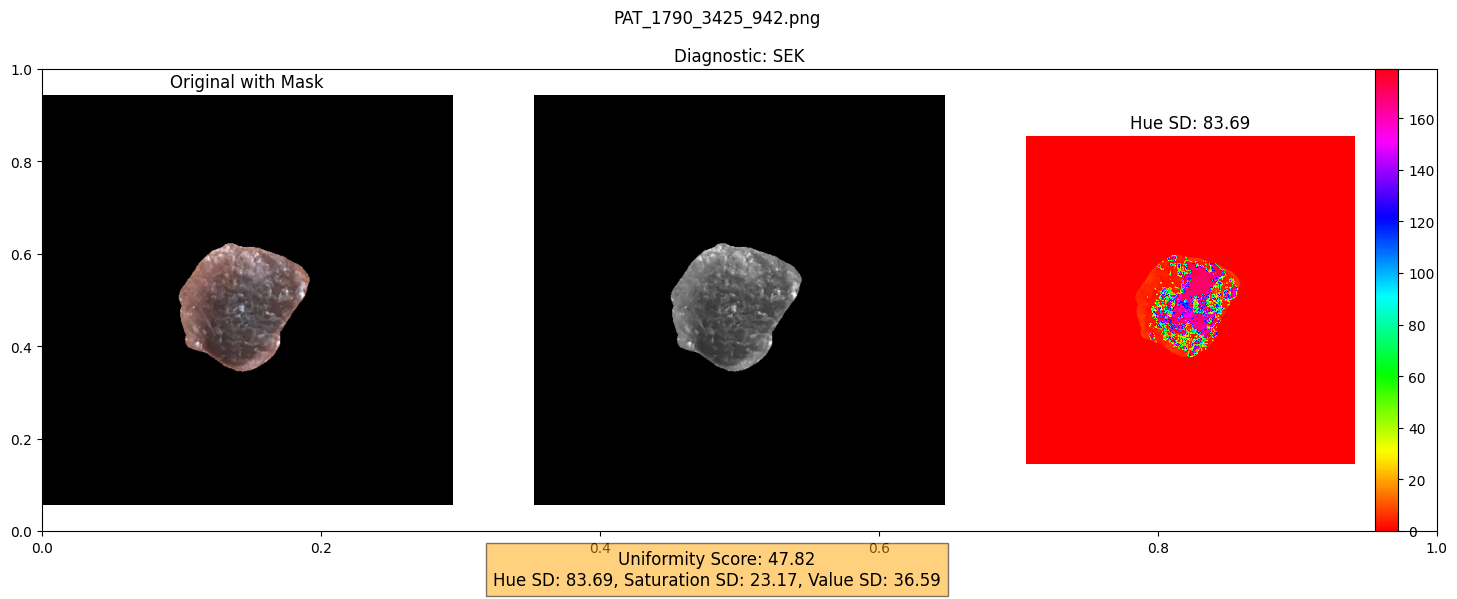

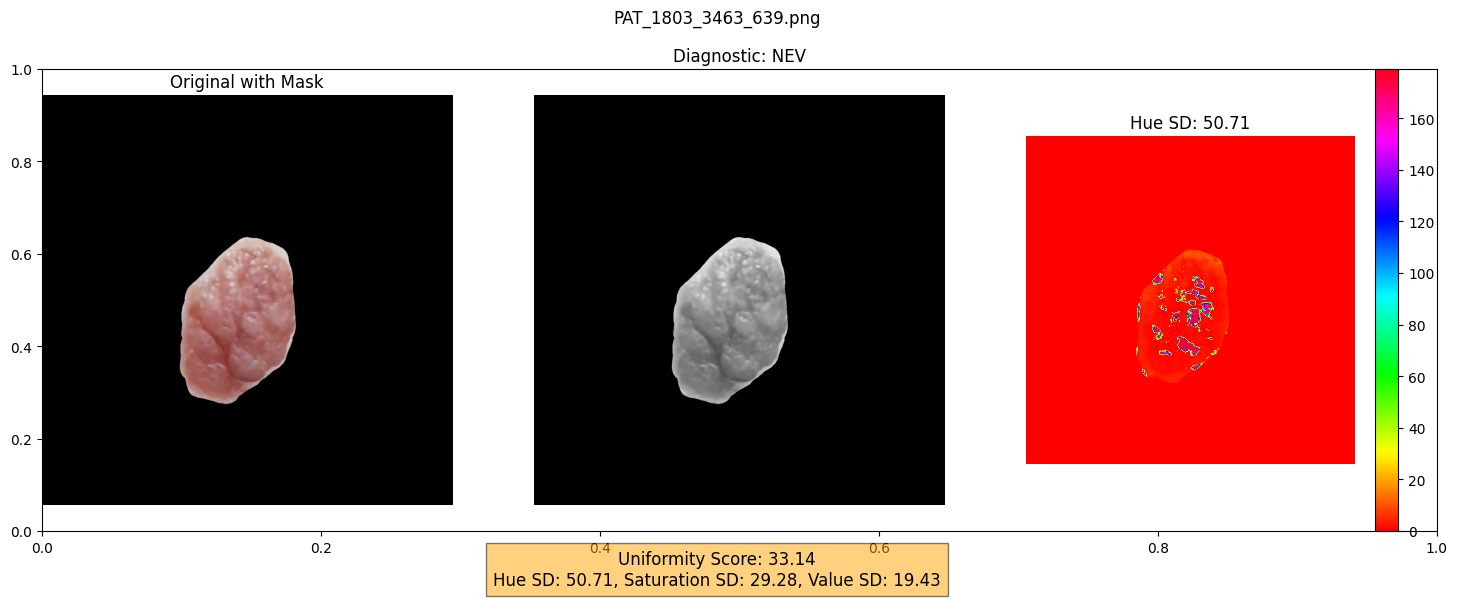

KeyboardInterrupt: 

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
#



raw_data_dir = '../data/images'
mask_dir = '../data/masks'
meta_csv = '../additional_files/metadata.csv'
meta_data = pd.read_csv(meta_csv)
meta_data = meta_data[['img_id','diagnostic']]



def calculate_hsv_deviations(hsv_image, mask):
    """Calculate the standard deviation for each HSV channel within the masked area."""
    mask_bool = mask > 0 #mask_bool, has True values where the mask is greater than 0 (indicating the area of interest) and False elsewhere.
    std_devs = []
    deviations = []
    std_devs = {'Hue': 0, 'Saturation': 0, 'Value': 0, 'Uniformity_Score': 0}
    for i, channel_name in enumerate(['Hue', 'Saturation', 'Value']):  # Iterate over HUE, SATURATION, VALUE channels
        channel = hsv_image[:, :, i] # [x,y, H/S/V] where x and y coordinates
        masked_channel = channel[mask_bool] # Apply mask
        std_dev = np.std(masked_channel)
        deviations.append(std_dev)
        std_devs[channel_name] = std_dev
    std_devs['Uniformity_Score'] = np.mean(deviations)
    return std_devs

def visualize_results(original_image, mask, hsv_image, title, std_devs, diagnostic):
    """Visualize the original image, mask applied, and HSV image for comparison, including diagnostic info."""
    plt.figure(figsize=(18, 6))
    plt.title(f'Diagnostic: {diagnostic}')
    # Original Image with Mask Overlay
    plt.subplot(1, 3, 1)
    masked_original = cv2.bitwise_and(original_image, original_image, mask=mask)
    plt.imshow(cv2.cvtColor(masked_original, cv2.COLOR_BGR2RGB))
    plt.title(f'Original with Mask')
    plt.axis('off')

    # Grayscale Image with Mask
    plt.subplot(1, 3, 2)
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    masked_grayscale = cv2.bitwise_and(grayscale_image, grayscale_image, mask=mask)
    plt.imshow(masked_grayscale, cmap='gray')
    plt.axis('off')

    # HSV Hue Channel with Mask
    plt.subplot(1, 3, 3)
    hue_channel = hsv_image[:, :, 0]
    masked_hue = hue_channel.copy()
    masked_hue[~(mask > 0)] = 0  # Zero out areas outside the mask
    plt.imshow(masked_hue, cmap='hsv')
    plt.colorbar()
    plt.title(f'Hue SD: {std_devs["Hue"]:.2f}')
    plt.axis('off')

    # Add text with uniformity scores
    plt.figtext(0.5, 0.02, f'Uniformity Score: {std_devs["Uniformity_Score"]:.2f}\n'
                f'Hue SD: {std_devs["Hue"]:.2f}, Saturation SD: {std_devs["Saturation"]:.2f}, Value SD: {std_devs["Value"]:.2f}', 
                ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
    
    plt.suptitle(title)
    plt.show()




def process_images_with_hsv_uniformity(raw_data_dir, mask_dir, meta_data):
    for filename in os.listdir(raw_data_dir):
        if filename.endswith(".png"):
            base_name = filename
            image_path = os.path.join(raw_data_dir, filename)
            mask_name = base_name[:-4] + '_mask.png'
            mask_path = os.path.join(mask_dir, mask_name)
            
            diagnostic_info = meta_data[meta_data['img_id'].str.lower() == base_name.lower()].diagnostic
            diagnostic = diagnostic_info.iloc[0] if not diagnostic_info.empty else 'Unknown'
            
            original_image = cv2.imread(image_path)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            
            if original_image is None or mask is None:
                print(f"Error loading image or mask for {filename}. Skipping...")
                continue
            
            hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
            std_devs = calculate_hsv_deviations(hsv_image, mask)
            visualize_results(original_image, mask, hsv_image, base_name, std_devs, diagnostic)



print("Hue SD:")
print("  Reflects _color_ diversity.")
print("  High SD: Wide variety of colors.")
print("  Low SD: Uniform color.\n")

print("Saturation SD:")#насыщенность
print("  Indicates _intensity_ variation.")
print("  High SD: Varying levels of color intensity.")
print("  Low SD: Consistent color intensity.\n")

print("Value SD:")
print("  Measures _brightness_ variation.")
print("  High SD: Varied brightness within the area.")
print("  Low SD: Uniform brightness.\n")

print("Total Uniformity Score:")
print("  Average of the above three SDs.")
print("  Low score: Overall color uniformity.")
print("  High score: Significant color variation.")


#MEL cancer
#SCC cancer
#BCC cancer
#NEV HEALTHY
#SEK non-cancer
#ACK non-cancer

process_images_with_hsv_uniformity(raw_data_dir, mask_dir, meta_data)


In [ ]:
meta_data = pd.read_csv(meta_csv)
meta_data = meta_data[['img_id','diagnostic']]
print(meta_data.head())  # Inspect the first few rows to ensure the data is loaded correctly


                  img_id diagnostic
0  PAT_1516_1765_530.png        NEV
1     PAT_46_881_939.png        BCC
2  PAT_1545_1867_547.png        ACK
3  PAT_1989_4061_934.png        ACK
4   PAT_684_1302_588.png        BCC
